<a href="https://colab.research.google.com/github/yaman9675/Bank-Marketing-Effectiveness-Prediction/blob/main/Yaman_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

#<b>Import libraries

In [ ]:
!pip install klib

     |████████████████████████████████| 132 kB 9.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import klib
from numpy import math
from matplotlib import rcParams

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

#<b>Mount Google Drive

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #file path reading or csv upload to coolab from drive
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'    
bank_df=pd.read_csv(file_path)

In [ ]:
#view head of the dataset
bank_df.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...

In [ ]:
 #file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'    
bank_df=pd.read_csv(file_path, sep = ";")

# **Data Summary**

In [ ]:
#Checking number of rows and columns in our dataset.
print("Number of rows is: ", bank_df.shape[0])
print("Number of columns is: ", bank_df.shape[1])

Number of rows is:  45211
Number of columns is:  17


In [ ]:
#the total number of elements in the array. 
print('Total number of element is: ', bank_df.size)

Total number of element is:  768587


In [ ]:
#Name of columns that we have in our data base 
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#view head of the dataset
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
#view tail of the dataset
bank_df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

## Missing Values

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [ ]:
#Checking the total null values in each feature
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From the result we can be assured that our data have no missing value and are good to go. In the case where you did have missing value in your data you can solve it by doing imputation or just remove the column altogether depending on your case.

# **Descriptive Analysis**

><i> Generally, <b>descriptive analyzes</b> are the first manipulations performed in a <b>quantitative</b> study and their main objective is to summarize and explore the behavior of the data involved in the study. Using statistical techniques such as <b>frequency distribution</b>, <b>measures of central tendency</b> and <b>measures of dispersion</b> we can better understand the way in which the phenomena under study behave.</i>

## A. Variable types

><i> In a <b>quantitative</b> study, it is very important to know what types of data are being studied, because for different types of data different analyzes are performed. The data is divided into two main types: <b>quantitative</b> and <b>qualitative</b>. We can describe them as follows:</i>

**Variáveis Qualitativas**

><i> Qualitative (or categorical) variables are characteristics that cannot be measured numerically, for example: Sex, Gender, Color and education. And they can be <b>nominal</b> or <b>ordinal</b>.</i>

**Variáveis Quantitativas**

><i> The variables classified as quantitative are the characteristics that can be measured on a quantitative scale, that is, they present numerical values that make sense, for example: <b>Height</b>, <b> Mass</b>, <b>Income</b> and <b>Age</b>.</i>

---

<center><img src = "https://i.stack.imgur.com/3QemG.gif"></center>

<a id="tipos"></a>

In [ ]:
# Describing data only for numerical features
bank_df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
# Describing data only for categorical features
bank_df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [ ]:
# data information, It give us non-null values and data type of every column
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### **Class Distribution**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [ ]:
bank_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

As we can see our class distribution is not balance approximate 88:12 distribution.

#**Exploratary Data Analysis**

Lets do Some Exploratary data analysis of dataset  if any inconsitancy somewhere lets deal with that

<b>Using klib Python library for cleaning, analyzing and preprocessing data.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


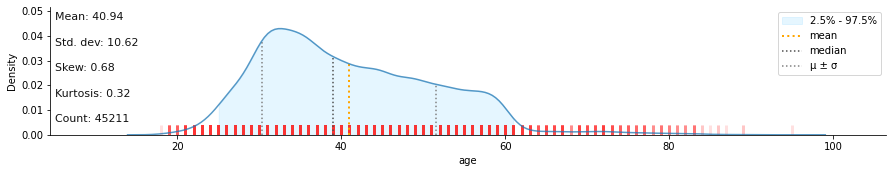

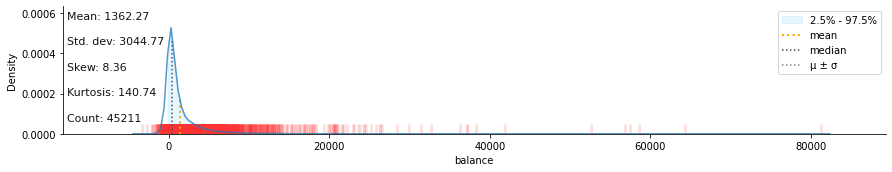

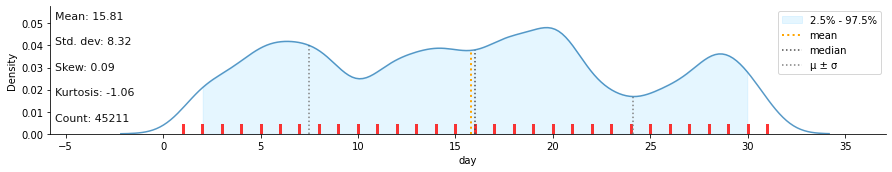

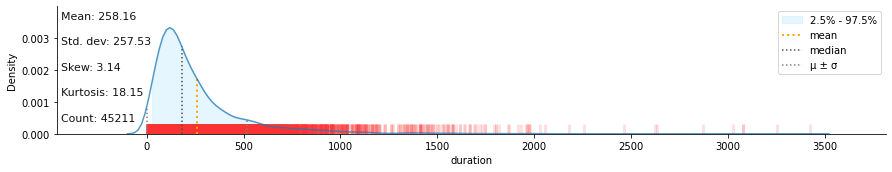

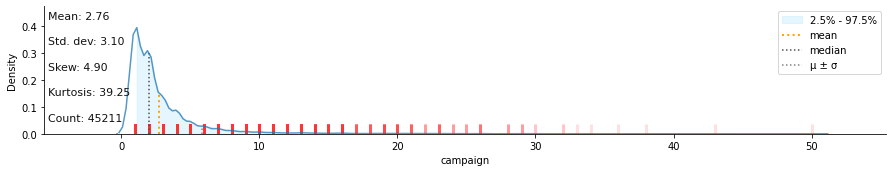

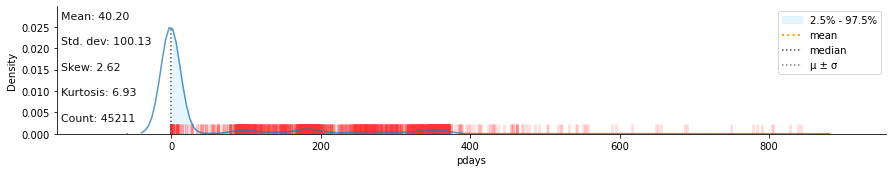

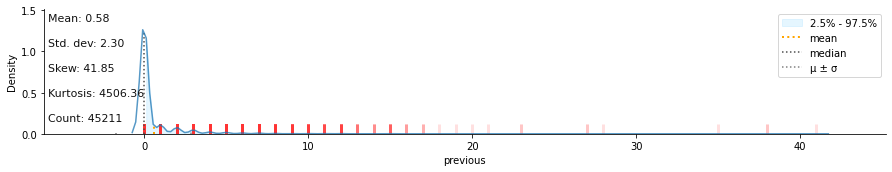

In [ ]:
# default representation of a distribution plot
klib.dist_plot(bank_df)

GridSpec(6, 10)

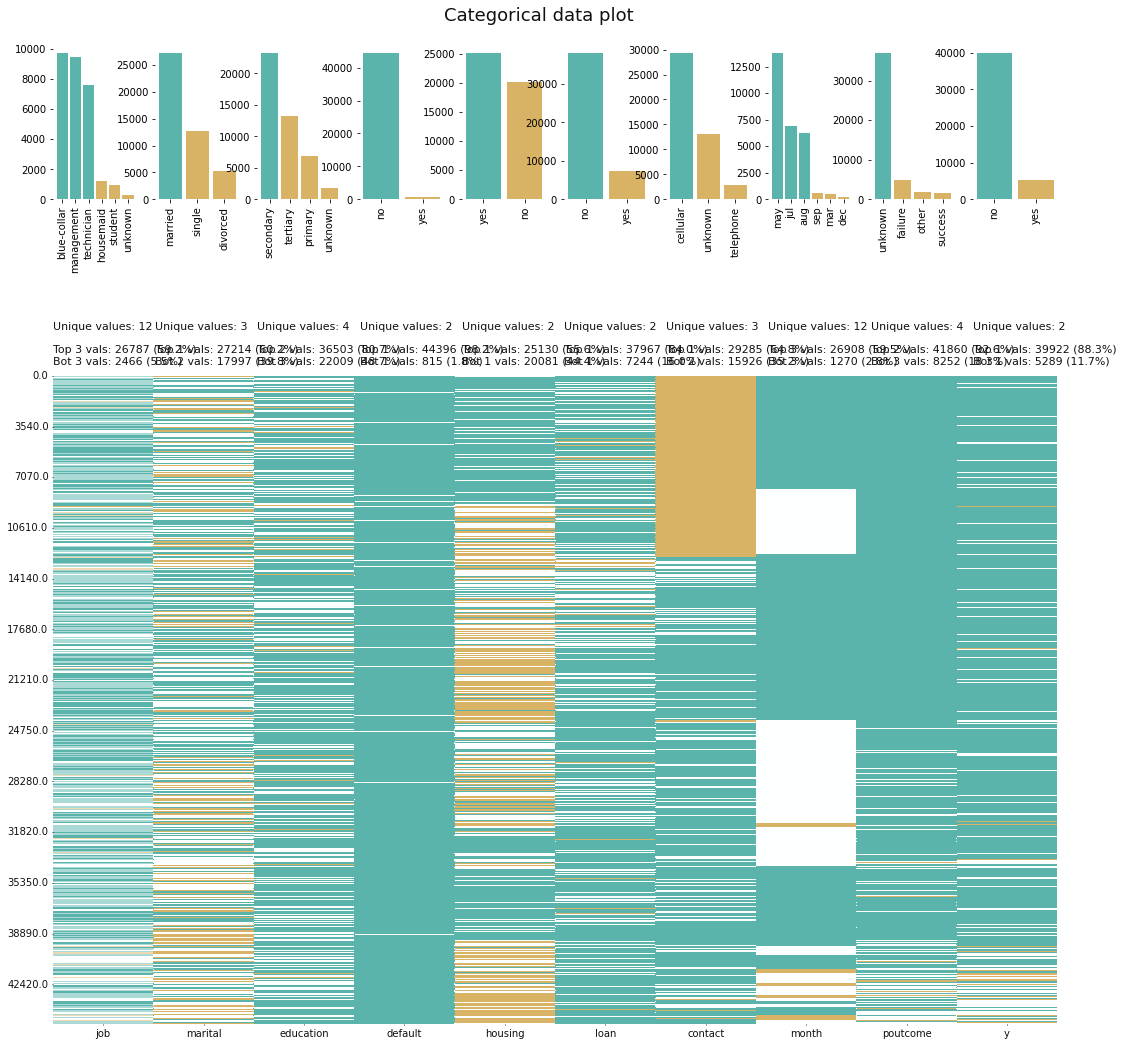

In [ ]:
#Categorical Data Plot
klib.cat_plot(bank_df)

## Central Trend Measures

<font color = "red"><b>Note: </b></font>

><i> In <b>statistics</b>, a central trend is a central value or a typical value for a probability distribution. The most common measures of central tendency are the <b>arithmetic mean</b>, the <b>median</b> and the <b>mode</b>.</i>

<a id="medidas"></a>


### Mean

<font color = "red"><b>Note: </b></font>

><i> In <b>statistics</b>, <b>mean</b> is defined as the value that shows the concentration of the data in a distribution, as the equilibrium point of the frequencies in a histogram. Average is also interpreted as a significant value in a list of numbers.</i>

> ## $\frac{1}{n}\sum_{i=0}^{n}X_i$

### Median

<font color = "red"><b>Note: </b></font>

><i> <b>Median</b> is the value that separates the major and minor half of a sample, population or probability distribution. In simpler terms, median can be the middle value of a data set. In the data set <b>{1, 3, 3, 6, 7, 8, 9}</b>, for example, the median is <b>6</b>.</i>

---

<center><img src = "https://www.mhnederlof.nl/images/median.jpg"></center>

### Mode

<font color = "red"><b>Note: </b></font>

><i><b>Mode</b> is one of the measures of height of a data set, as well as the mean and the median. It can be defined in sample and population fashion. In relation to the first one, the sampling mode of a data set deals with the value that occurs most frequently or the most common value in a data set. </i>


#**1) Age**

In [ ]:
#Lets see the age feature
age = bank_df['age'].value_counts().reset_index()   #count each unique age numerical value present in our dataset
age = age.rename(columns = {'index':'age', 'age':'age_count'}) #renaming it column as per good understanding
age['count%'] = age['age_count']*100/len(bank_df) #calculating the % of count each unique age numerical value present in our dataset
age.head() #head of age dataset

age  age_count    count%
0   32       2085  4.611710
1   31       1996  4.414855
2   33       1972  4.361770
3   34       1930  4.268873
4   35       1894  4.189246

In [ ]:
#Tail of age dataset
age.tail()

age  age_count    count%
72   93          2  0.004424
73   90          2  0.004424
74   95          2  0.004424
75   88          2  0.004424
76   94          1  0.002212

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


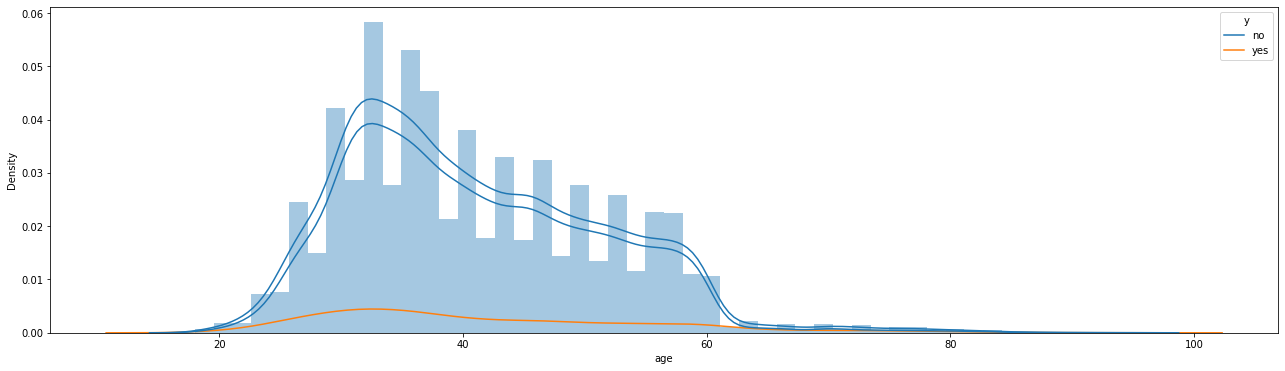

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.age,hue=bank_df.y)  #ploting k-density plot for seeing yes and no corresponding to age feature
sns.distplot(bank_df['age']) #ploting distribution plot of feature age

In [ ]:
#Central Trend Measures
age_mean = bank_df['age'].mean()  # Calculating mean
age_median = bank_df['age'].median() #Calculating median
age_mode = bank_df['age'].mode() #Calculating mode
age_max = age['age'].max()  #Finding maximum age
age_min = age['age'].min() #Finding minimum age

#Printing the results of central trend
print(f'Mean of the age is: {age_mean}')
print(f'Median of the age is: {age_median}')
print(f'Maximum age is: {age_max}')
print(f'Minimum age is: {age_min}')
print(f'Mode of the age is: {age_mode}')

Mean of the age is: 40.93621021432837
Median of the age is: 39.0
Maximum age is: 95
Minimum age is: 18
Mode of the age is: 0    32
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


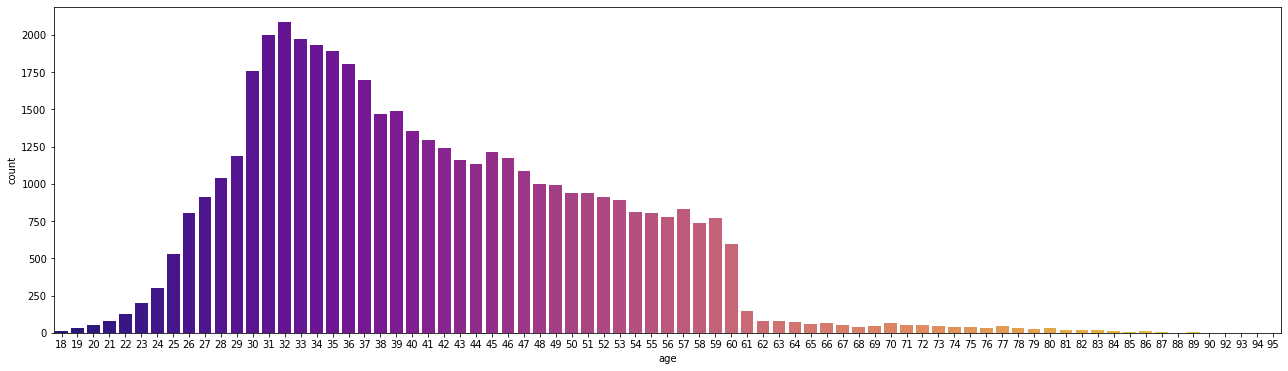

In [ ]:
#Ploting countplot of age feature 
plt.figure(figsize=(22,6))
sns.countplot(bank_df['age'], palette="plasma")

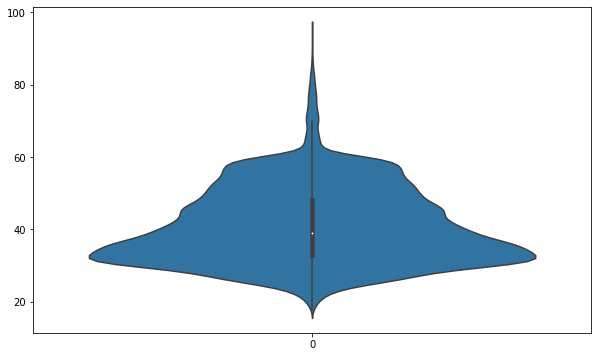

In [ ]:
#Ploting violinplot to see if there is any outlires in age feature
plt.figure(figsize=(10,6))
sns.violinplot(data=bank_df['age'])

In [ ]:
#Calculating lower limit and upper limit using IQR formula
age_q1 = bank_df['age'].quantile(0.25)
age_q3 = bank_df['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_ll  = age_q1 - 1.5*age_iqr
age_ul  = age_q3 + 1.5*age_iqr
# print(age_q1)
# print(age_q3)
# print(age_iqr)
print(f'Lower limit of age :{age_ll}')
print(f'Upper limit of age :{age_ul}')

Lower limit of age :10.5
Upper limit of age :70.5


In [ ]:
#Lets explore the age variables more

#let see what percentage of 18 years old customers accept term deposit
age_18 = bank_df[bank_df['age']==18]
age_18_y = 100 * (len(age_18[age_18['y'] == 'yes'])) / (len(age_18))
print(f'The % of 18 year old customer accept term deposit is: {round(age_18_y, 2)}')

#let see what percentage of 32 years old customers accept term deposit
age_32 = bank_df[bank_df['age']==32]
age_32_y = 100 * (len(age_32[age_32['y'] == 'yes'])) / (len(age_32))
print(f'The % of 32 year old customer accept term deposit is: {round(age_32_y, 2)}')

#let see what percentage of 18 to 30 years old customers accept term deposit
age_18_30 = bank_df[(bank_df['age']>18) & (bank_df['age']<30)] 
age_18_30_y = 100 * (len(age_18_30[age_18_30['y'] == 'yes'])) / (len(age_18_30))
print(f'The % of 18 to 30 year old customer accept term deposit is: {round(age_18_30_y, 2)}')

#lets see the % of term deposit acceptance from 30 to 100 year old customer each 10 year slot 
r = [] #empty list to store the % result
for i in range(30,100,10):
  age = bank_df[(bank_df['age']>=i) & (bank_df['age']<i+10)]  #creating seperate data of age that contain 10 year slot
  age_y = 100 * (len(age[age['y'] == 'yes'])) / (len(age))  # % of yes in each 10 year slot
  r.append(age_y) # append the yes % result in r
  
#Print age range and their % of term deposit acceptance  
i = 30 #initial value of age is 30 year
for j in r:
  print(f'The % of {i} to {i+10} year old customer accept term deposit is: {round(j, 2)}')
  i = i + 10

The % of 18 year old customer accept term deposit is: 58.33
The % of 32 year old customer accept term deposit is: 10.6
The % of 18 to 30 year old customer accept term deposit is: 17.51
The % of 30 to 40 year old customer accept term deposit is: 10.58
The % of 40 to 50 year old customer accept term deposit is: 9.12
The % of 50 to 60 year old customer accept term deposit is: 9.33
The % of 60 to 70 year old customer accept term deposit is: 29.67
The % of 70 to 80 year old customer accept term deposit is: 42.45
The % of 80 to 90 year old customer accept term deposit is: 39.67
The % of 90 to 100 year old customer accept term deposit is: 77.78


Text(0.5, 1.0, 'Age v/s % of term deposit acceptance')

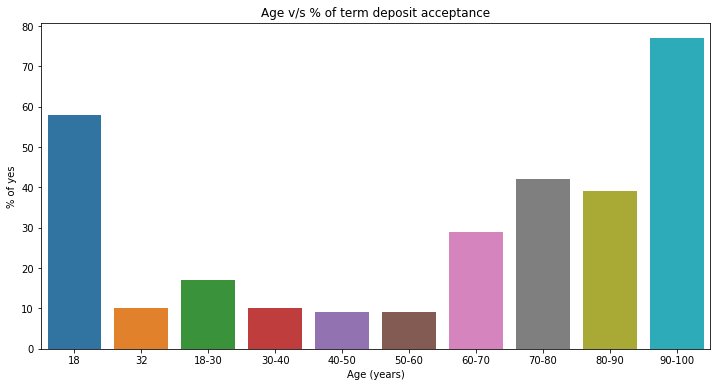

In [ ]:
#Lets see the barplot of the yes % of age feature 
plt.figure(figsize=(12,6))
sns.barplot(x= ['18', '32', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'], y= [58, 10, 17,10,9,9,29,42,39,77])
plt.xlabel('Age (years)')
plt.ylabel('% of yes')
plt.title('Age v/s % of term deposit acceptance')

#**2. Job**

Type of job: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown.

In [ ]:
#creating a dataset of job type
job = bank_df['job'].value_counts().reset_index()
job = job.rename(columns = {'index':'job_type', 'job':'job_count'}) # renaming the column
job['job_count%'] = job['job_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in job['job_type']:
  a = len(bank_df[(bank_df['job'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in job['job_type']:
  b = len(bank_df[(bank_df['job'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
job['yes%'] = (yes/job['job_count'])*100

# converting numbers into % of no
job['no%'] = (no/job['job_count'])*100

#Lets see dataset of job
job

job_type  job_count  job_count%       yes%        no%
0     blue-collar       9732   21.525735   7.274969  92.725031
1      management       9458   20.919688  13.755551  86.244449
2      technician       7597   16.803433  11.056996  88.943004
3          admin.       5171   11.437482  12.202669  87.797331
4        services       4154    9.188029   8.883004  91.116996
5         retired       2264    5.007631  22.791519  77.208481
6   self-employed       1579    3.492513  11.842939  88.157061
7    entrepreneur       1487    3.289023   8.271688  91.728312
8      unemployed       1303    2.882042  15.502686  84.497314
9       housemaid       1240    2.742695   8.790323  91.209677
10        student        938    2.074716  28.678038  71.321962
11        unknown        288    0.637013  11.805556  88.194444

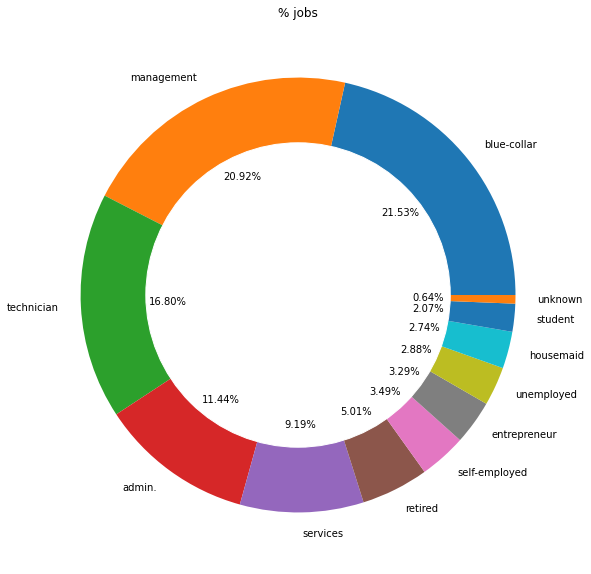

In [ ]:
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.job.value_counts(),labels=bank_df.job.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% jobs')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


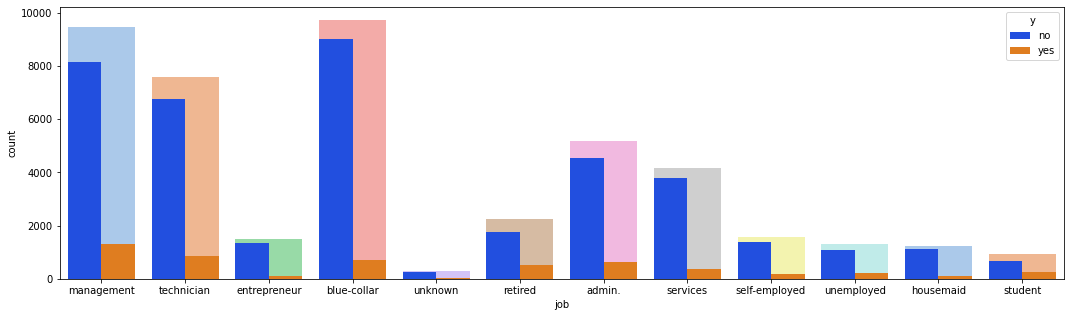

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(bank_df.job, ax=ax, palette='pastel')
sns.countplot(bank_df.job, hue=bank_df.y,ax=ax, palette='bright')

#**3. Marital Status**

Marital status: divorced, married, single, unknown (note: divorced means divorced or widowed)



In [ ]:
#creating a dataset of marital status
marital = bank_df['marital'].value_counts().reset_index()
marital = marital.rename(columns = {'index':'marital', 'marital':'marital_count'}) # renaming the column
marital['marital_count%'] = marital['marital_count']*100/len(bank_df)  # creating new column of job count for each  marital status type

#finding out the number of each  marital status type category who accept term deposit
yes = []
for y in marital['marital']:
  a = len(bank_df[(bank_df['marital'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each  marital status type category who did not accept term deposit
no = []
for n in marital['marital']:
  b = len(bank_df[(bank_df['marital'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
marital['yes%'] = (yes/marital['marital_count'])*100

# converting numbers into % of no
marital['no%'] = (no/marital['marital_count'])*100

# #Lets see dataset of  marital status
marital

marital  marital_count  marital_count%       yes%        no%
0   married          27214       60.193316  10.123466  89.876534
1    single          12790       28.289576  14.949179  85.050821
2  divorced           5207       11.517109  11.945458  88.054542

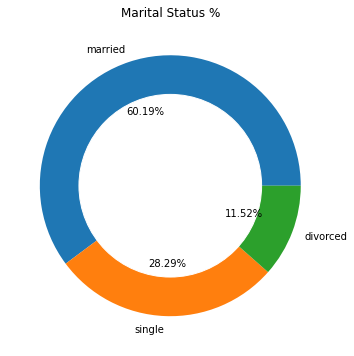

In [ ]:
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.marital.value_counts(),labels=bank_df.marital.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status %')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

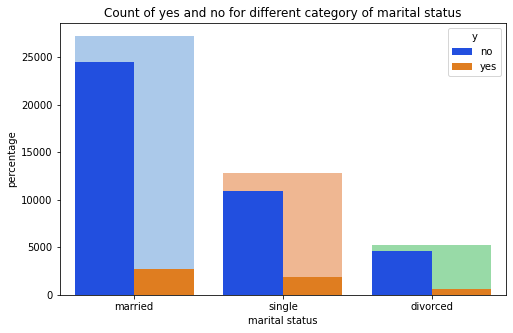

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.marital, ax=ax, palette='pastel')
sns.countplot(bank_df.marital, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('marital status')
plt.ylabel('percentage')
plt.title('Count of yes and no for different category of marital status')

#**4. Education**

Education: Secondary, Primary,Tertiary and Unknown

In [ ]:
#creating a dataset of different education type present in our dataset
education = bank_df['education'].value_counts().reset_index()
education = education.rename(columns = {'index':'education', 'education':'education_count'}) # renaming the column
education['education_count%'] = education['education_count']*100/len(bank_df)  # creating new column of education count for each education type

#finding out the number of each education type category who accept term deposit
yes = []
for y in education['education']:
  a = len(bank_df[(bank_df['education'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each education type category who did not accept term deposit
no = []
for n in education['education']:
  b = len(bank_df[(bank_df['education'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
education['yes%'] = (yes/education['education_count'])*100

# converting numbers into % of no
education['no%'] = (no/education['education_count'])*100

#Lets see dataset of education
education

education  education_count  education_count%       yes%        no%
0  secondary            23202         51.319369  10.559435  89.440565
1   tertiary            13301         29.419831  15.006390  84.993610
2    primary             6851         15.153392   8.626478  91.373522
3    unknown             1857          4.107407  13.570275  86.429725

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


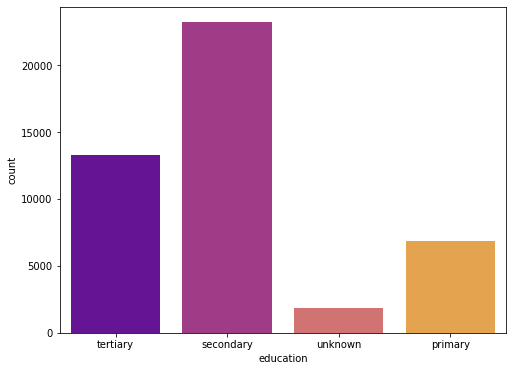

In [ ]:
#Countplot of different type of education  
plt.figure(figsize=(8,6))
sns.countplot(bank_df['education'], palette="plasma")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for different education level')

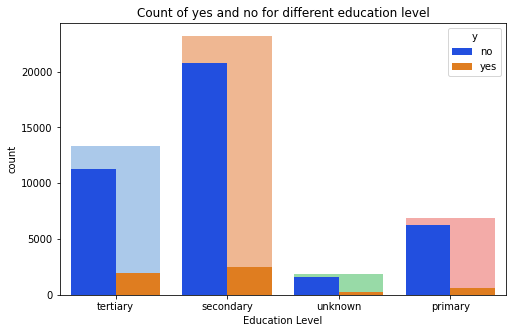

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.education, ax=ax, palette='pastel')
sns.countplot(bank_df.education, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Education Level')
plt.title('Count of yes and no for different education level')

#**5. Default**

Default: has credit in default? (categorical: no, yes, unknown)

In [ ]:
#creating a dataset of default catergory
default = bank_df['default'].value_counts().reset_index()
default = default.rename(columns = {'index':'default', 'default':'default_count'}) # renaming the column as per understanding
default['default_count%'] = default['default_count']*100/len(bank_df)  # creating new column of default count for each category

#finding out the number of default category who accept term deposit
yes = []
for y in default['default']:
  a = len(bank_df[(bank_df['default'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of default category who did not accept term deposit
no = []
for n in default['default']:
  b = len(bank_df[(bank_df['default'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
default['yes%'] = (yes/default['default_count'])*100

# converting numbers into % of no
default['no%'] = (no/default['default_count'])*100

# #Lets see dataset of default category
default

default  default_count  default_count%       yes%        no%
0      no          44396       98.197341  11.796108  88.203892
1     yes            815        1.802659   6.380368  93.619632

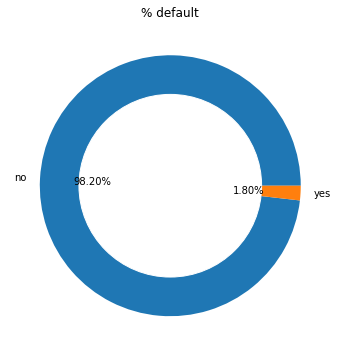

In [ ]:
#Lets see pie plot of default categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.default.value_counts(),labels=bank_df.default.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% default')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for default category')

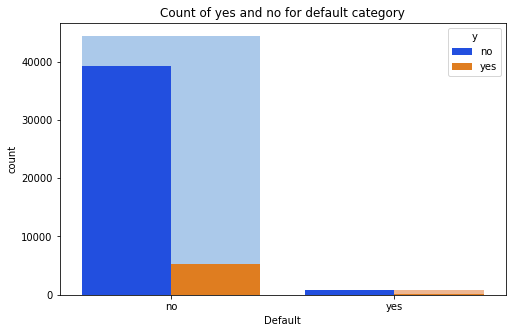

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.default, ax=ax, palette='pastel')
sns.countplot(bank_df.default, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Default')
plt.title('Count of yes and no for default category')

#**6. Housing Loan**

Housing: has housing loan? (categorical: no, yes, unknown)

In [ ]:
#creating a dataset of house loan category
housing = bank_df['housing'].value_counts().reset_index()
housing = housing.rename(columns = {'index':'housing', 'housing':'housing_count'}) # renaming the column
housing['housing_count%'] = housing['housing_count']*100/len(bank_df)  # creating new column of house loan count for each category

#finding out the number of housing loan category who accept term deposit
yes = []
for y in housing['housing']:
  a = len(bank_df[(bank_df['housing'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of housing loan category who did not accept term deposit
no = []
for n in housing['housing']:
  b = len(bank_df[(bank_df['housing'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
housing['yes%'] = (yes/housing['housing_count'])*100

# converting numbers into % of no
housing['no%'] = (no/housing['housing_count'])*100

# #Lets see dataset of housing loan
housing

housing  housing_count  housing_count%       yes%        no%
0     yes          25130       55.583818   7.699960  92.300040
1      no          20081       44.416182  16.702355  83.297645

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


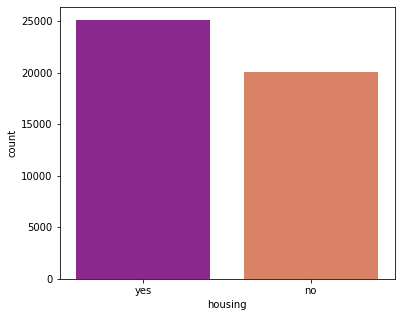

In [ ]:
#Countplot of house loan category   
plt.figure(figsize=(6,5))
sns.countplot(bank_df['housing'], palette="plasma")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for house loan category')

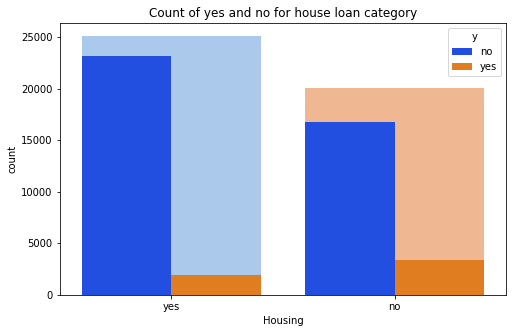

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.housing, ax=ax, palette='pastel')
sns.countplot(bank_df.housing, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Housing')
plt.title('Count of yes and no for house loan category')

#**7. Personal Loan**

Loan: has personal loan? (categorical: no, yes, unknown)

In [ ]:
#creating a dataset of personal loan category
loan = bank_df['loan'].value_counts().reset_index()
loan = loan.rename(columns = {'index':'loan', 'loan':'loan_count'}) # renaming the column
loan['loan_count%'] = loan['loan_count']*100/len(bank_df)  # creating new column of personal loan count for each category

#finding out the number of personal loan category category who accept term deposit
yes = []
for y in loan['loan']:
  a = len(bank_df[(bank_df['loan'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of personal loan category category who did not accept term deposit
no = []
for n in loan['loan']:
  b = len(bank_df[(bank_df['loan'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
loan['yes%'] = (yes/loan['loan_count'])*100

# converting numbers into % of no
loan['no%'] = (no/loan['loan_count'])*100

# #Lets see dataset of personal loan category
loan

loan  loan_count  loan_count%       yes%        no%
0   no       37967    83.977351  12.655727  87.344273
1  yes        7244    16.022649   6.681391  93.318609

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


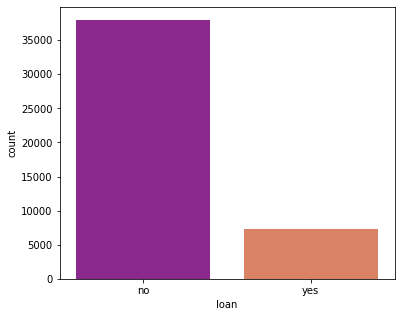

In [ ]:
#Countplot of personal loan category 
plt.figure(figsize=(6,5))
sns.countplot(bank_df['loan'], palette="plasma")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for personal loan category')

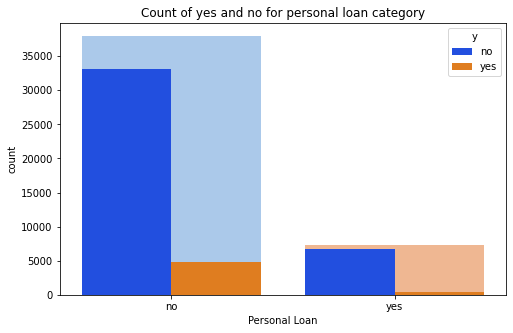

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.loan, ax=ax, palette='pastel')
sns.countplot(bank_df.loan, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for personal loan category')

#**8. Contact**

Contact: contact communication type (categorical: cellular, telephone)

In [ ]:
#creating a dataset of different contact type
contact = bank_df['contact'].value_counts().reset_index()
contact = contact.rename(columns = {'index':'contact', 'contact':'contact_count'}) # renaming the column
contact['contact_count%'] = contact['contact_count']*100/len(bank_df)  # creating new contact_count column of different contact type

#finding out the number of each contact type category who accept term deposit
yes = []
for y in contact['contact']:
  a = len(bank_df[(bank_df['contact'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each contact type category who did not accept term deposit
no = []
for n in contact['contact']:
  b = len(bank_df[(bank_df['contact'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
contact['yes%'] = (yes/contact['contact_count'])*100

# converting numbers into % of no
contact['no%'] = (no/contact['contact_count'])*100

# #Lets see dataset of contact
contact

contact  contact_count  contact_count%       yes%        no%
0   cellular          29285       64.774059  14.918900  85.081100
1    unknown          13020       28.798301   4.070661  95.929339
2  telephone           2906        6.427639  13.420509  86.579491

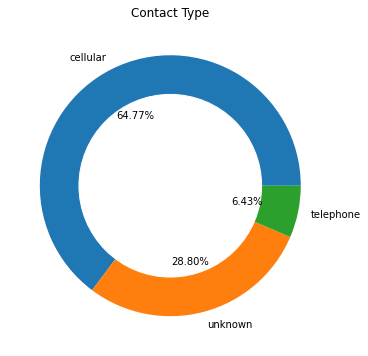

In [ ]:
#Lets see pie plot of contact categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.contact.value_counts(),labels=bank_df.contact.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Contact Type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for contact category')

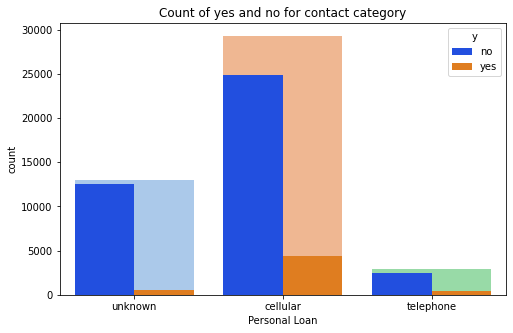

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.contact, ax=ax, palette='pastel')
sns.countplot(bank_df.contact, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for contact category')

#**9.Day**

Date of the month

In [ ]:
#creating a dataset of different days
day = bank_df['day'].value_counts().reset_index()
day = day.rename(columns = {'index':'day', 'day':'day_count'}) # renaming the column
day['day_count%'] = day['day_count']*100/len(bank_df)  # creating new column of different date of each date in every month

#finding out the number of accept term deposit on each day
yes = []
for y in day['day']:
  a = len(bank_df[(bank_df['day'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of not accept term deposit on each day
no = []
for n in day['day']:
  b = len(bank_df[(bank_df['day'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
day['yes%'] = (yes/day['day_count'])*100

# converting numbers into % of no
day['no%'] = (no/day['day_count'])*100

#Lets see dataset of days
day.head()

day  day_count  day_count%      yes%        no%
0   20       2752    6.087014  6.976744  93.023256
1   18       2308    5.104952  9.878683  90.121317
2   21       2026    4.481210  9.921027  90.078973
3   17       1939    4.288779  9.076844  90.923156
4    6       1932    4.273296  9.368530  90.631470

In [ ]:
day.tail()

day  day_count  day_count%       yes%        no%
26   25        840    1.857955  15.833333  84.166667
27   31        643    1.422220   7.153966  92.846034
28   10        524    1.159010  23.091603  76.908397
29   24        447    0.988697  13.870246  86.129754
30    1        322    0.712216  27.950311  72.049689

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


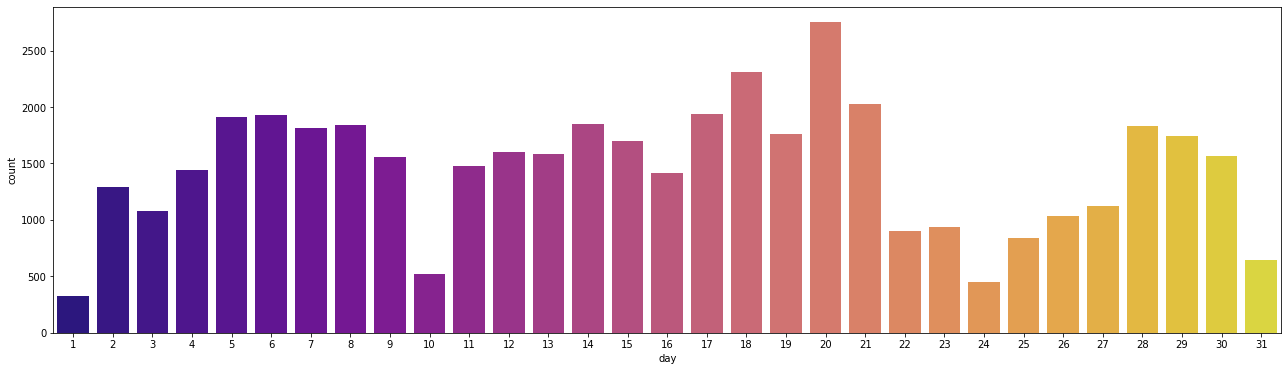

In [ ]:
#Countplot of different day present in our dataset
plt.figure(figsize=(22,6))
sns.countplot(bank_df['day'], palette="plasma")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


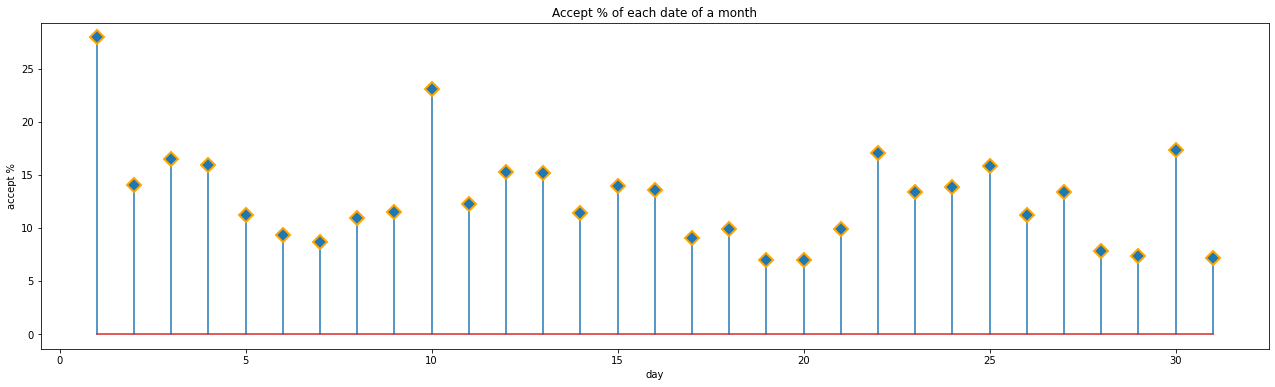

In [ ]:
# create data of days
x= day['day']
value = day['yes%'] 
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('day')
plt.ylabel('accept %')
plt.title('Accept % of each date of a month')
plt.show()

#**10. Month**

Month: last contact month of year (categorical: jan, feb, mar, ..., nov, dec)

In [ ]:
#creating a dataset of every month
month = bank_df['month'].value_counts().reset_index()
month = month.rename(columns = {'index':'month', 'month':'month_count'}) # renaming the column
month['month_count%'] = month['month_count']*100/len(bank_df)  # creating new column of month count present in our dataset

#finding out the number of accept term deposit every month vise
yes = []
for y in month['month']:
  a = len(bank_df[(bank_df['month'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of not accept term deposit every month vise
no = []
for n in month['month']:
  b = len(bank_df[(bank_df['month'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
month['yes%'] = (yes/month['month_count'])*100

# converting numbers into % of no
month['no%'] = (no/month['month_count'])*100

# #Lets see dataset of each month
month

month  month_count  month_count%       yes%        no%
0    may        13766     30.448342   6.719454  93.280546
1    jul         6895     15.250713   9.093546  90.906454
2    aug         6247     13.817434  11.013286  88.986714
3    jun         5341     11.813497  10.222805  89.777195
4    nov         3970      8.781049  10.151134  89.848866
5    apr         2932      6.485147  19.679400  80.320600
6    feb         2649      5.859194  16.647792  83.352208
7    jan         1403      3.103227  10.121169  89.878831
8    oct          738      1.632346  43.766938  56.233062
9    sep          579      1.280662  46.459413  53.540587
10   mar          477      1.055053  51.991614  48.008386
11   dec          214      0.473336  46.728972  53.271028

Text(0.5, 1.0, 'frequency_of_Month')

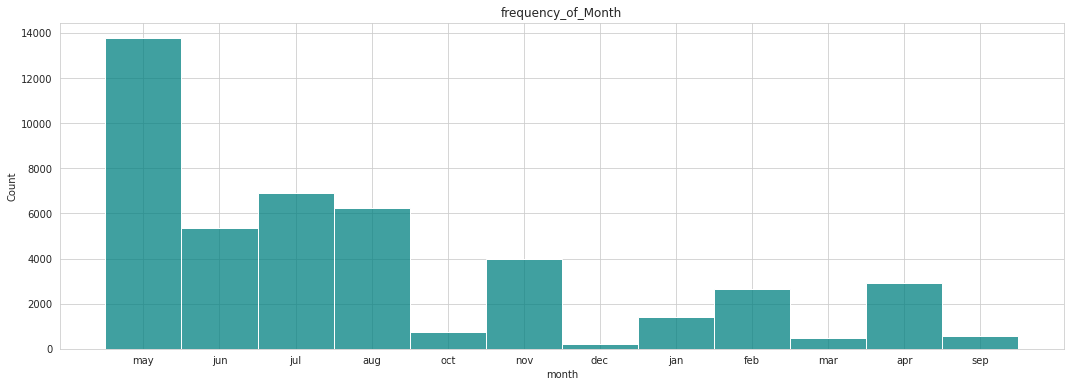

In [ ]:
#Lets see the histogram of every month 
rcParams['figure.figsize'] = 18,6
sns.set_style('whitegrid')
visual6 = sns.histplot(data=bank_df, x=bank_df['month'], color='teal')
visual6.set_title('frequency_of_Month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of yes and no for every month')

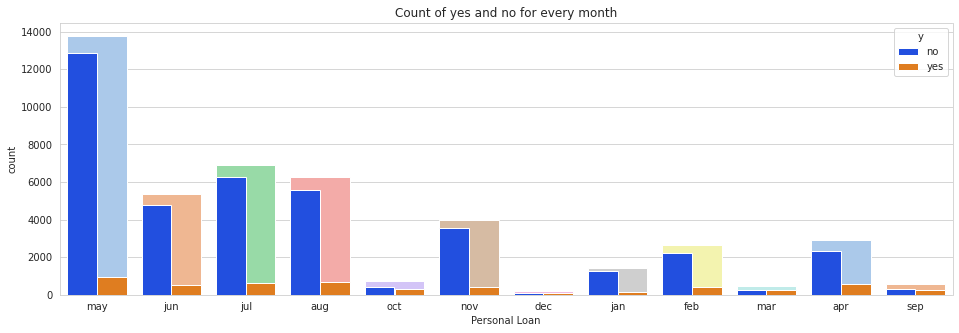

In [ ]:
#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(bank_df.month, ax=ax, palette='pastel')
sns.countplot(bank_df.month, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for every month')

#**11. Campaign**

Campaign: **number of contacts performed during this campaign** and for this client (numeric, includes last contact)

In [ ]:
#creating a dataset of number of contacts
campaign = bank_df['campaign'].value_counts().reset_index()
campaign = campaign.rename(columns = {'index':'no_of_contact', 'campaign':'no_of_person'}) # renaming the column
campaign['no_of_person%'] = campaign['no_of_person']*100/len(bank_df)  # creating new column of % number of person per number of contact 

#finding out the number of acceptance term deposit with different number of contacts
yes = []
for y in campaign['no_of_contact']:
  a = len(bank_df[(bank_df['campaign'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of not acceptance term deposit with different number of contacts
no = []
for n in campaign['no_of_contact']:
  b = len(bank_df[(bank_df['campaign'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
campaign['yes%'] = (yes/campaign['no_of_person'])*100

# converting numbers into % of no
campaign['no%'] = (no/campaign['no_of_person'])*100

# #Lets see dataset of number of contacts
campaign.head()

no_of_contact  no_of_person  no_of_person%       yes%        no%
0              1         17544      38.804716  14.597583  85.402417
1              2         12505      27.659198  11.203519  88.796481
2              3          5521      12.211630  11.193624  88.806376
3              4          3522       7.790140   9.000568  90.999432
4              5          1764       3.901705   7.879819  92.120181

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


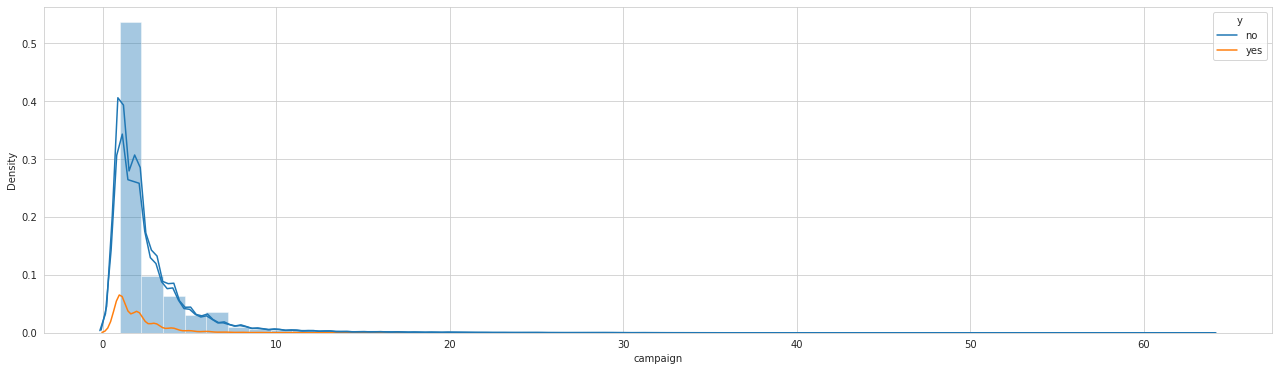

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.campaign,hue=bank_df.y)
sns.distplot(bank_df['campaign'])

In [ ]:
#Central Trend Measures
campaign_mean = bank_df['campaign'].mean()  # Calculating mean
campaign_median = bank_df['campaign'].median()  #Calculating median
campaign_mode = bank_df['campaign'].mode()  #Calculating mode
campaign_max = campaign['no_of_contact'].max() #Finding maximum number of contact during current campaign
campaign_min = campaign['no_of_contact'].min()  #Finding minimum number of contact during current campaign

#Printing the results of central trend
print(f'Mean of the no of contact is: {campaign_mean}')
print(f'Median of the no of contact is: {campaign_median}')
print(f'Maximum no of contact is: {campaign_max}')
print(f'Minimum no of contact is: {campaign_min}')
print(f'Mode of no of contact is: {campaign_mode}')

Mean of the no of contact is: 2.763840658246887
Median of the no of contact is: 2.0
Maximum no of contact is: 63
Minimum no of contact is: 1
Mode of no of contact is: 0    1
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


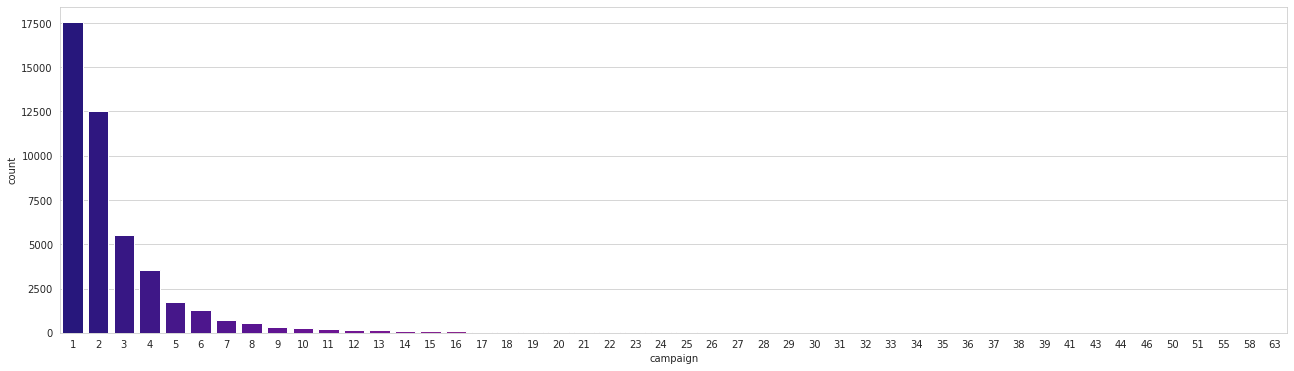

In [ ]:
#Countplot of various number of contact were perfomed to how many people
plt.figure(figsize=(22,6))
sns.countplot(bank_df['campaign'], palette="plasma")

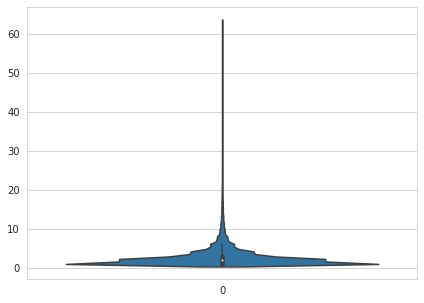

In [ ]:
#Creating vilion plot for visulazation of oultires
plt.figure(figsize=(7,5))
sns.violinplot(data=bank_df['campaign'])

In [ ]:
#Calculating lower limit and upper limit using IQR formula
campaign_q1 = bank_df['campaign'].quantile(0.25)
campaign_q3 = bank_df['campaign'].quantile(0.75)
campaign_iqr = campaign_q3 - campaign_q1
campaign_ll  = campaign_q1 - 1.5*campaign_iqr
campaign_ul  = campaign_q3 + 1.5*campaign_iqr
# print(campaign_q1)
# print(campaign_q3)
# print(campaign_iqr)
print(f'Lower limit of campaign :{campaign_ll}')
print(f'Upper limit of campaign :{campaign_ul}')

Lower limit of campaign :-2.0
Upper limit of campaign :6.0


In [ ]:
#After some analysing we will see that 99.99% data comes under number of contact 32.
campaign_32 = campaign[campaign['no_of_contact']<=32]
campaign_32.head(2)

no_of_contact  no_of_person  no_of_person%       yes%        no%
0              1         17544      38.804716  14.597583  85.402417
1              2         12505      27.659198  11.203519  88.796481

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


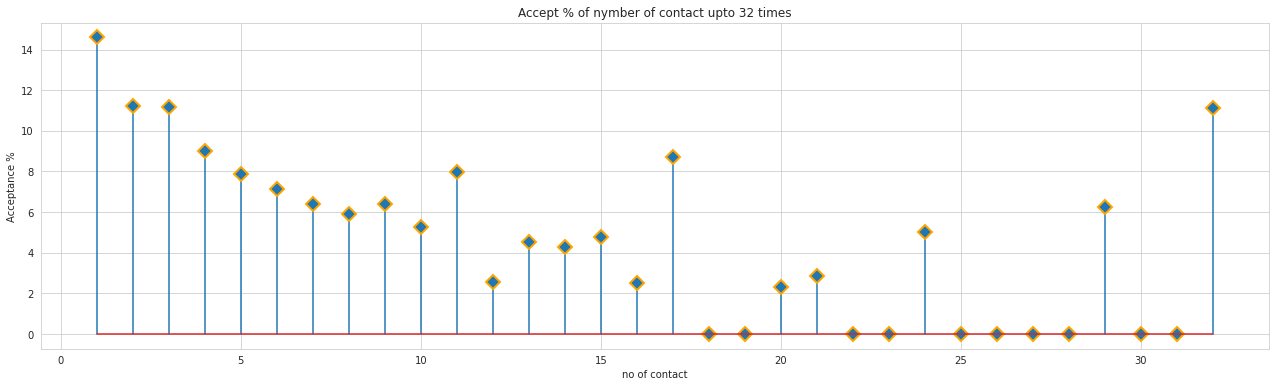

In [ ]:
# create data
x= campaign_32['no_of_contact']
value = campaign_32['yes%']
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('no of contact')
plt.ylabel('Acceptance %')
plt.title('Accept % of nymber of contact upto 32 times')
plt.show()

#**12. Previous**

Previous: number of contacts performed before this campaign and for this client (numeric)

In [ ]:
#creating a dataset of number of contacts in last campaign
previous = bank_df['previous'].value_counts().reset_index()
previous = previous.rename(columns = {'index':'no_of_contact', 'previous':'no_of_person'}) # renaming the column
previous['no_of_person%'] = previous['no_of_person']*100/len(bank_df)  # creating no of person% new column

#finding out how many number of contact conert into yes
yes = []
for y in previous['no_of_contact']:
  a = len(bank_df[(bank_df['previous'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out how many number of contact conert into no
no = []
for n in previous['no_of_contact']:
  b = len(bank_df[(bank_df['previous'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
previous['yes%'] = (yes/previous['no_of_person'])*100

# converting numbers into % of no
previous['no%'] = (no/previous['no_of_person'])*100

# #Lets see dataset of previous
previous.head()

no_of_contact  no_of_person  no_of_person%       yes%        no%
0              0         36954      81.736745   9.157331  90.842669
1              1          2772       6.131251  21.031746  78.968254
2              2          2106       4.658158  21.652422  78.347578
3              3          1142       2.525934  25.744308  74.255692
4              4           714       1.579262  23.949580  76.050420

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


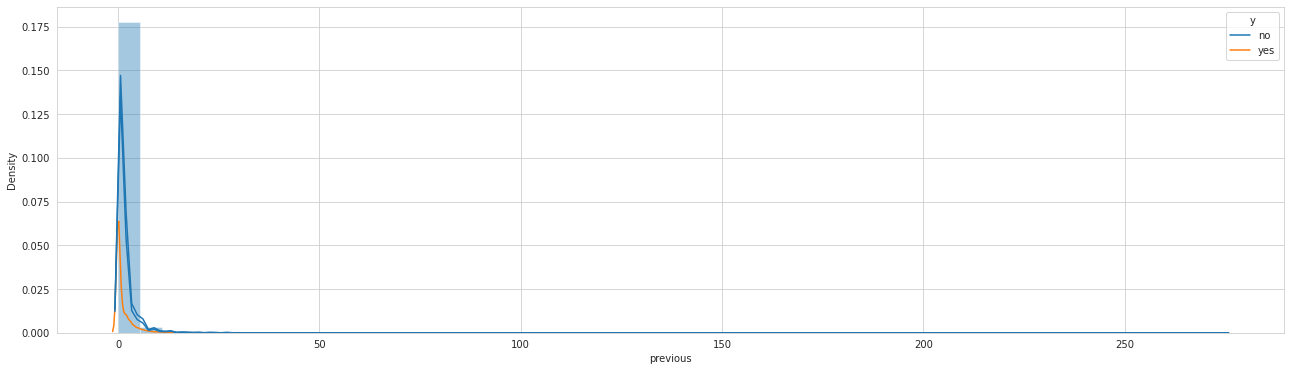

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.previous,hue=bank_df.y) #ploting k-density plot for seeing yes and no corresponding to number of contacts in last campaign
sns.distplot(bank_df['previous'])  #ploting distribution plot of number of contacts in last campaign

In [ ]:
#Central Trend Measures
previous_mean = bank_df['previous'].mean()  # Calculating mean
previous_median = bank_df['previous'].median()  #Calculating median
previous_mode = bank_df['previous'].mode()    #Calculating mode
previous_max = previous['no_of_contact'].max()  #Finding number of contact in previous campaign
previous_min = previous['no_of_contact'].min()  #Finding number of contact in previous campaign

#Printing the results of central trend
print(f'Mean of the no of contact before the campaign is: {previous_mean}')
print(f'Median of the no of contact  before the campaign is: {previous_median}')
print(f'Maximum no of contact  before the campaign is: {previous_max}')
print(f'Minimum no of contact  before the campaign is: {previous_min}')
print(f'Mode of no of contact  before the campaign is: {previous_mode}')

Mean of the no of contact before the campaign is: 0.5803233726305546
Median of the no of contact  before the campaign is: 0.0
Maximum no of contact  before the campaign is: 275
Minimum no of contact  before the campaign is: 0
Mode of no of contact  before the campaign is: 0    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


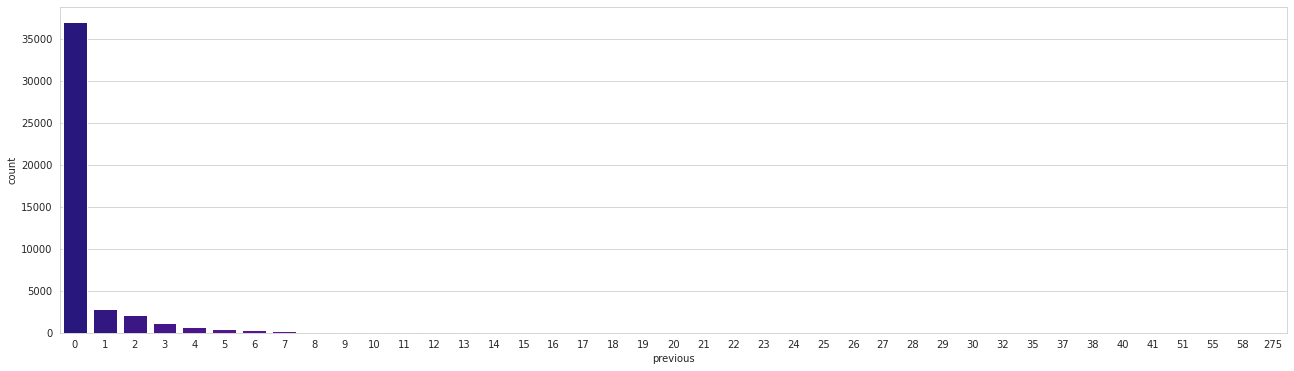

In [ ]:
#Ploting countplot of previous feature
plt.figure(figsize=(22,6))
sns.countplot(bank_df['previous'], palette="plasma")

In [ ]:
#Calculating lower limit and upper limit using IQR formula
prev_q1 = bank_df['previous'].quantile(0.25)
prev_q3 = bank_df['previous'].quantile(0.75)
prev_iqr = prev_q3 - prev_q1
prev_ll  = prev_q1 - 1.5*prev_iqr
prev_ul  = prev_q3 + 1.5*prev_iqr
# print(prev_q1)
# print(prev_q3)
# print(prev_iqr)
print(f'Lower limit of age :{prev_ll}')
print(f'Upper limit of age :{prev_ul}')

Lower limit of age :0.0
Upper limit of age :0.0


In [ ]:
previous_9 = previous[previous['no_of_contact']<=9]
previous_9

no_of_contact  no_of_person  no_of_person%       yes%        no%
0              0         36954      81.736745   9.157331  90.842669
1              1          2772       6.131251  21.031746  78.968254
2              2          2106       4.658158  21.652422  78.347578
3              3          1142       2.525934  25.744308  74.255692
4              4           714       1.579262  23.949580  76.050420
5              5           459       1.015240  26.361656  73.638344
6              6           277       0.612683  29.963899  70.036101
7              7           205       0.453429  26.341463  73.658537
8              8           129       0.285329  30.232558  69.767442
9              9            92       0.203490  26.086957  73.913043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


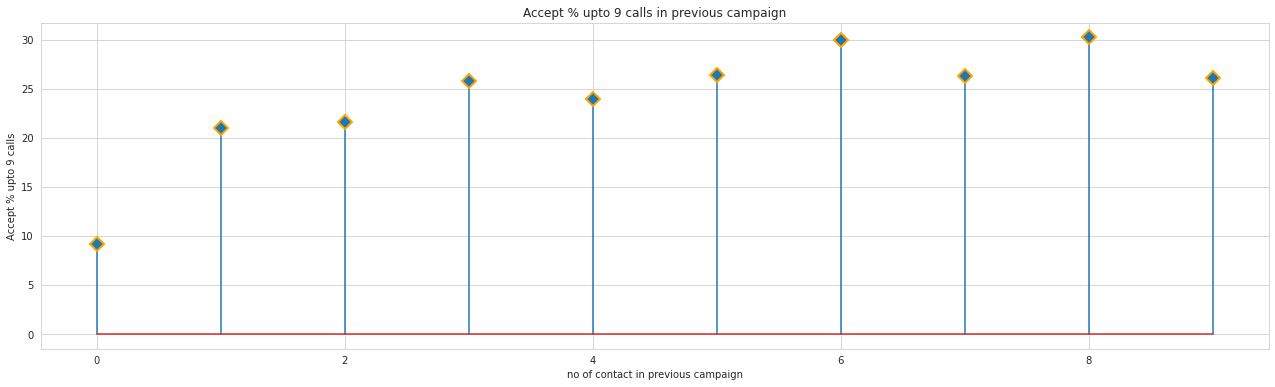

In [ ]:
# create data under no of contact in previous campaign upto 9 times
x= previous_9['no_of_contact']
value = previous_9['yes%']
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('no of contact in previous campaign')
plt.ylabel('Accept % upto 9 calls')
plt.title('Accept % upto 9 calls in previous campaign')
plt.show()

#<b>13.Balance

In [ ]:
#creating a dataset of balance of the customer
balance = bank_df['balance'].value_counts().reset_index()
balance = balance.rename(columns = {'index':'balance', 'balance':'no_of_customer'}) # renaming the column
balance['customer%'] = balance['no_of_customer']*100/len(bank_df)  # creating customer% new column

#finding out the accept term deposit on the basis of balance
yes = []
for y in balance['balance']:
  a = len(bank_df[(bank_df['balance'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the reject term deposit on the basis of balance
no = []
for n in balance['balance']:
  b = len(bank_df[(bank_df['balance'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
balance['yes%'] = (yes/balance['no_of_customer'])*100

# converting numbers into % of no
balance['no%'] = (no/balance['no_of_customer'])*100

#Lets see dataset of balance
balance.head()

balance  no_of_customer  customer%       yes%        no%
0        0            3514   7.772445   8.309619  91.690381
1        1             195   0.431311   8.717949  91.282051
2        2             156   0.345049  10.256410  89.743590
3        4             139   0.307447   7.913669  92.086331
4        3             134   0.296388   8.955224  91.044776

In [ ]:
balance.tail()

balance  no_of_customer  customer%  yes%    no%
7163     -381               1   0.002212   0.0  100.0
7164     4617               1   0.002212   0.0  100.0
7165    20584               1   0.002212   0.0  100.0
7166     4358               1   0.002212   0.0  100.0
7167    16353               1   0.002212   0.0  100.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


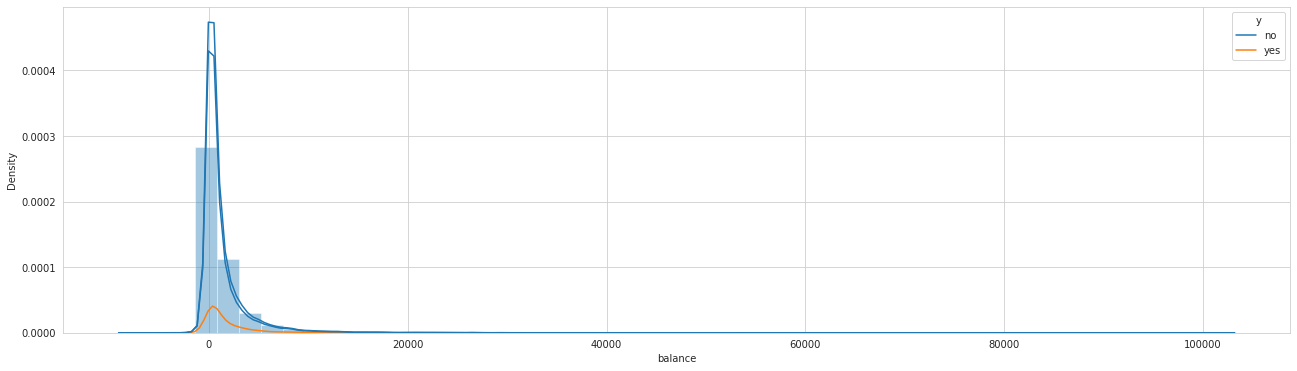

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.balance,hue=bank_df.y) #ploting k-density plot for seeing yes and no corresponding to account balance
sns.distplot(bank_df['balance'])  #ploting distribution plot of account balance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


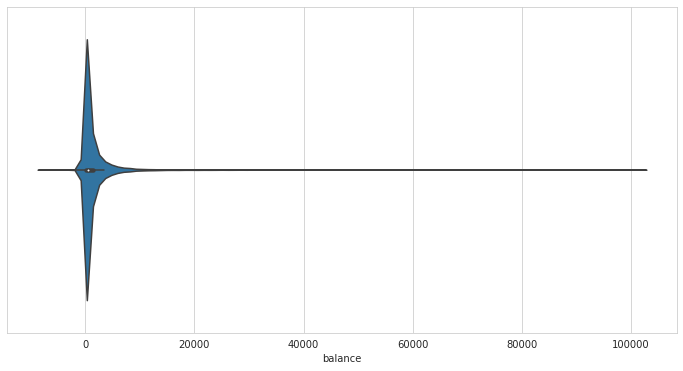

In [ ]:
#Plotting violinplot for visulazing 
plt.figure(figsize=(12,6))
sns.violinplot(bank_df['balance'])

In [ ]:
#Lets explore the balance variables more

#let see what percentage of under 0 balance customers accept term deposit
bal_0 = bank_df[bank_df['balance']<0]
bal_0_y = 100 * (len(bal_0[bal_0['y'] == 'yes'])) / (len(bal_0))
print(f'The % of acceptance term deposit whose balance bellow 0: {round(bal_0_y, 2)}')

#lets see the % of term deposit acceptance from 0 to 110000 balance customer each 10000 slot 
rb = [] #empty list to store the % result
for i in range(0,110000,10000):
  bal = bank_df[(bank_df['balance']>=i) & (bank_df['balance']<i+10000)]
  bal_y = 100 * (len(bal[bal['y'] == 'yes'])) / (len(bal))
  rb.append(bal_y)
  
#Print balance range and their % of term deposit acceptance  
i = 0 #initial value of balance is 0
for j in rb:
  print(f'The % of acceptance term deposit whose balance between {i} to {i+10000}: {round(j, 2)}')
  i = i + 10000

The % of acceptance term deposit whose balance bellow 0: 5.58
The % of acceptance term deposit whose balance between 0 to 10000: 12.17
The % of acceptance term deposit whose balance between 10000 to 20000: 16.67
The % of acceptance term deposit whose balance between 20000 to 30000: 14.18
The % of acceptance term deposit whose balance between 30000 to 40000: 16.67
The % of acceptance term deposit whose balance between 40000 to 50000: 10.0
The % of acceptance term deposit whose balance between 50000 to 60000: 20.0
The % of acceptance term deposit whose balance between 60000 to 70000: 0.0
The % of acceptance term deposit whose balance between 70000 to 80000: 0.0
The % of acceptance term deposit whose balance between 80000 to 90000: 100.0
The % of acceptance term deposit whose balance between 90000 to 100000: 0.0
The % of acceptance term deposit whose balance between 100000 to 110000: 0.0


Text(0.5, 1.0, 'Balance v/s % of term deposit acceptance')

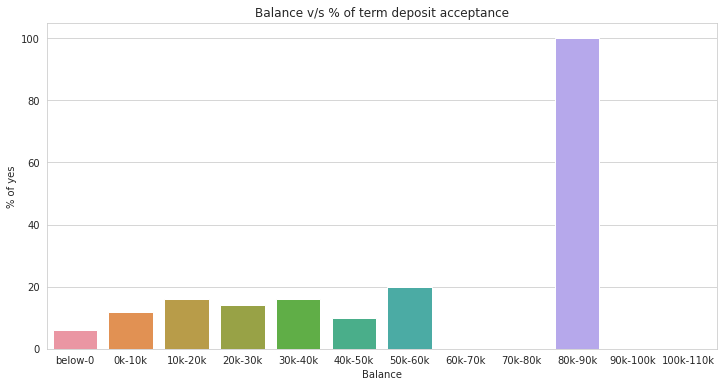

In [ ]:
#Plotting bar graph with 10k slots each and their % of acceptance term deposit
plt.figure(figsize=(12,6))
sns.barplot(x= ['below-0','0k-10k','10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k'],
            y= [6,12,16,14,16,10,20,0,0,100,0,0])
plt.xlabel('Balance')
plt.ylabel('% of yes')
plt.title('Balance v/s % of term deposit acceptance')

#**14. Pdays**

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [ ]:
#Creating dataset of pdays
pdays = bank_df['pdays'].value_counts().reset_index()
pdays = pdays.rename(columns = {'index':'last_days', 'pdays':'last_days_count'}) # renaming the column
pdays['last_days_count%'] = pdays['last_days_count']*100/len(bank_df)  # creating last_days_count% new column

#finding out accept term deposit on the basis of pdays
yes = []
for y in pdays['last_days']:
  a = len(bank_df[(bank_df['pdays'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out reject term deposit on the basis of pdays
no = []
for n in pdays['last_days']:
  b = len(bank_df[(bank_df['pdays'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
pdays['yes%'] = (yes/pdays['last_days_count'])*100

# converting numbers into % of no
pdays['no%'] = (no/pdays['last_days_count'])*100

# #Lets see dataset of pdays
pdays.head()

last_days  last_days_count  last_days_count%       yes%        no%
0         -1            36954         81.736745   9.157331  90.842669
1        182              167          0.369379  47.904192  52.095808
2         92              147          0.325142  65.306122  34.693878
3         91              126          0.278693  59.523810  40.476190
4        183              126          0.278693  50.793651  49.206349

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


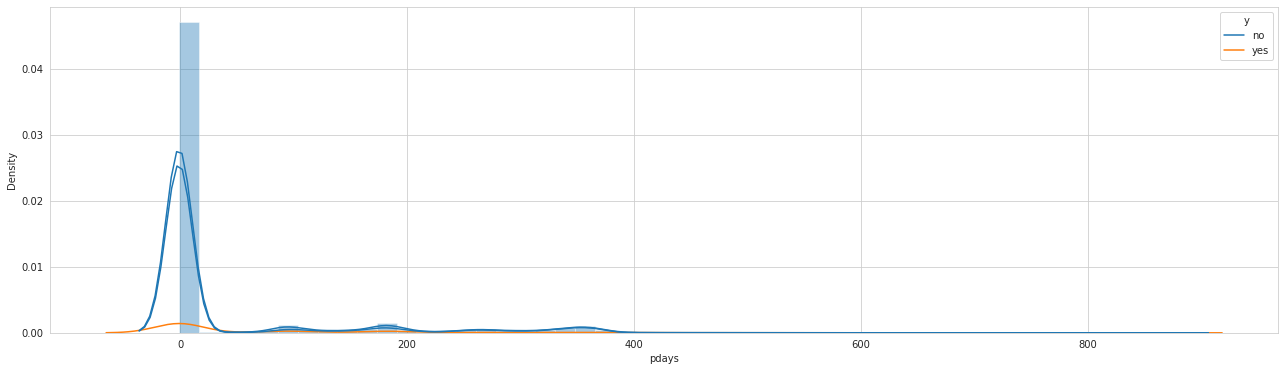

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.pdays,hue=bank_df.y) #ploting k-density plot for seeing yes and no corresponding to pdays
sns.distplot(bank_df['pdays'])  #ploting distribution plot of pdays

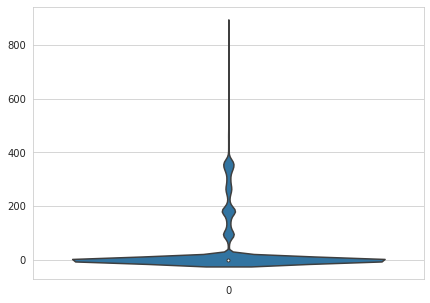

In [ ]:
#Plotting vilion plot to identify outlires
plt.figure(figsize=(7,5))
sns.violinplot(data=bank_df['pdays'])

In [ ]:
#let see what percentage of below 0 pdays customers accept term deposit
pday_0 = bank_df[bank_df['pdays']<0]
pday_0_y = 100 * (len(pday_0[pday_0['y'] == 'yes'])) / (len(pday_0))
print(f'The % of acceptance term deposit that was not connected previously: {round(pday_0_y, 2)}')

#lets see the % of term deposit acceptance from 0 to 800 pdays customer each 30 days slot 
rpd = [] #empty list to store the % result
for i in range(0,800,30):
  pday = bank_df[(bank_df['pdays']>=i) & (bank_df['pdays']<i+30)]
  pday_y = 100 * (len(pday[pday['y'] == 'yes'])) / (len(pday))
  rpd.append(pday_y)
  
#Print pdays range and their % of term deposit acceptance  
k = 0
i = 0 #initial value of age is 30 year
for j in rpd:
  print(f'The % of {k} to {i+30} previous days accept term deposit is: {round(j, 2)}')
  i = i + 30

The % of acceptance term deposit that was not connected previously: 9.16
The % of 0 to 30 previous days accept term deposit is: 14.97
The % of 0 to 60 previous days accept term deposit is: 38.0
The % of 0 to 90 previous days accept term deposit is: 40.85
The % of 0 to 120 previous days accept term deposit is: 40.66
The % of 0 to 150 previous days accept term deposit is: 19.34
The % of 0 to 180 previous days accept term deposit is: 13.88
The % of 0 to 210 previous days accept term deposit is: 37.24
The % of 0 to 240 previous days accept term deposit is: 14.76
The % of 0 to 270 previous days accept term deposit is: 8.76
The % of 0 to 300 previous days accept term deposit is: 16.44
The % of 0 to 330 previous days accept term deposit is: 11.39
The % of 0 to 360 previous days accept term deposit is: 7.9
The % of 0 to 390 previous days accept term deposit is: 11.46
The % of 0 to 420 previous days accept term deposit is: 53.85
The % of 0 to 450 previous days accept term deposit is: 71.05
The 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


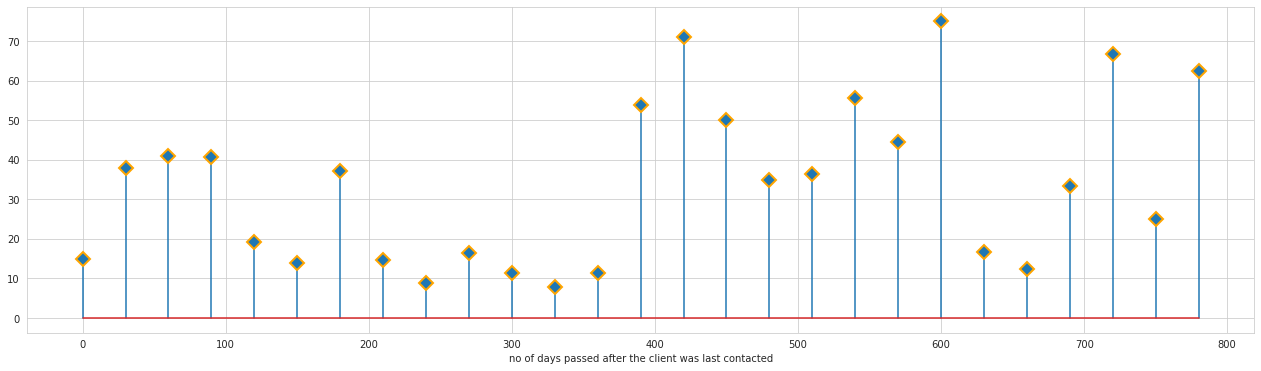

In [ ]:
# create data
x= range(0,800,30)
value = rpd
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('no of days passed after the client was last contacted')
plt.show()

#**15.Poutcome**

poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

In [ ]:
#creating a dataset of poutcome (outcome of the previous marketing campaign)
pout = bank_df['poutcome'].value_counts().reset_index()
pout = pout.rename(columns = {'index':'p_result', 'poutcome':'p_result_count'}) # renaming the column
pout['p_result_count%'] = pout['p_result_count']*100/len(bank_df)  # creating p_result_count% new column

#finding out the poutcomes who accept term deposit
yes = []
for y in pout['p_result']:
  a = len(bank_df[(bank_df['poutcome'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the poutcomes who did not accept term deposit
no = []
for n in pout['p_result']:
  b = len(bank_df[(bank_df['poutcome'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
pout['yes%'] = (yes/pout['p_result_count'])*100

# converting numbers into % of no
pout['no%'] = (no/pout['p_result_count'])*100

# #Lets see dataset of poutcome
pout

p_result  p_result_count  p_result_count%       yes%        no%
0  unknown           36959        81.747805   9.161503  90.838497
1  failure            4901        10.840282  12.609671  87.390329
2    other            1840         4.069806  16.684783  83.315217
3  success            1511         3.342107  64.725347  35.274653

Text(0.5, 1.0, 'Count of result in previous campaign')

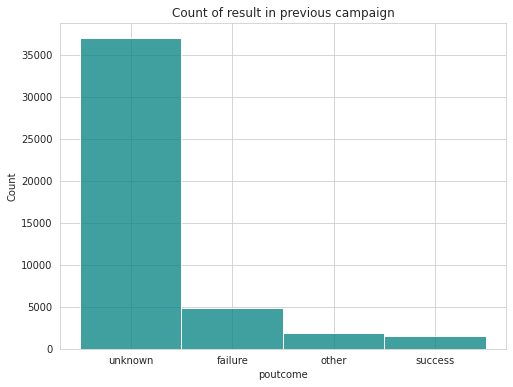

In [ ]:
#let see the histogram of poutcomes
rcParams['figure.figsize'] = 8,6
sns.set_style('whitegrid')
visual6 = sns.histplot(data=bank_df, x=bank_df['poutcome'], color='teal')
visual6.set_title('Count of result in previous campaign')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


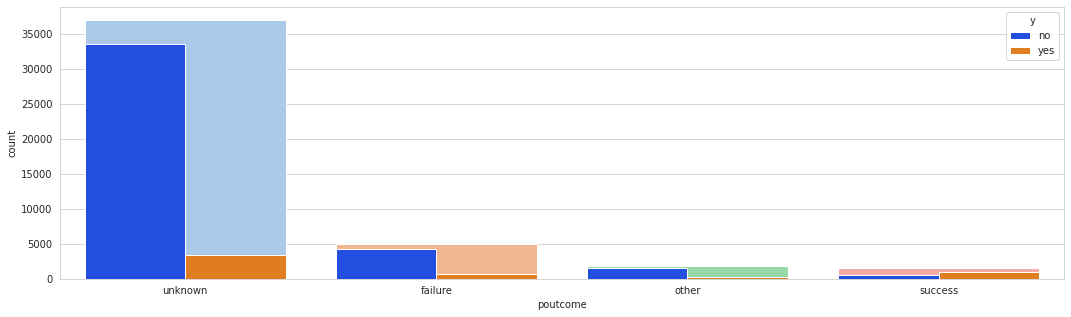

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of poutcome (result in previous campaign)
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(bank_df.poutcome, ax=ax, palette='pastel')
sns.countplot(bank_df.poutcome, hue=bank_df.y,ax=ax, palette='bright')

#**16. Duration**

Duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


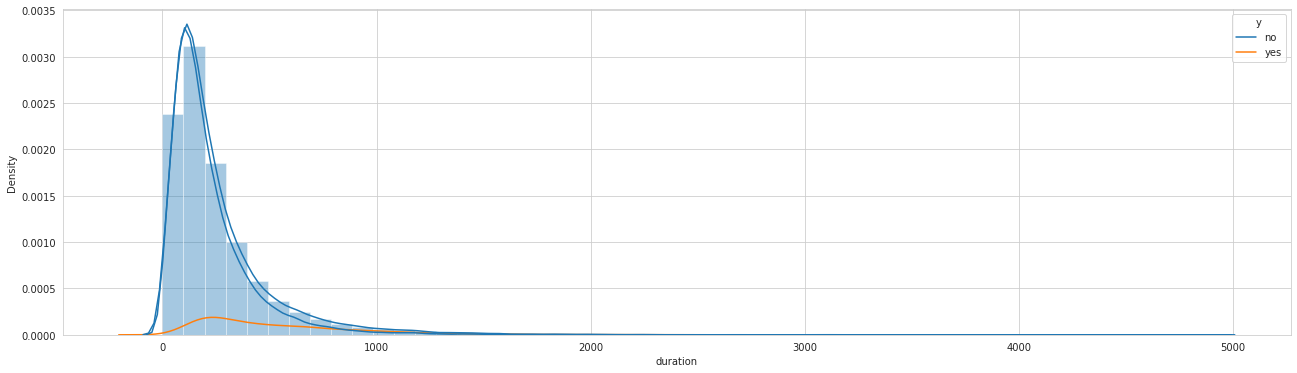

In [ ]:
plt.figure(figsize=(22,6))
sns.kdeplot(bank_df.duration,hue=bank_df.y)  #ploting k-density plot for seeing yes and no corresponding to call duration
sns.distplot(bank_df.duration)  #ploting distribution plot of call duration

In [ ]:
#Central Trend Measures
dura_mean = bank_df['duration'].mean()  # Calculating mean
dura_median = bank_df['duration'].median()  # Calculating median
dura_mode = bank_df['duration'].mode()  # Calculating mode
dura_max = bank_df['duration'].max()  #Finding longest call duration
dura_min = bank_df['duration'].min()  #Finding shortest call duration

#Printing the results of central trend
print(f'Mean of the duration is: {dura_mean}')
print(f'Median of the duration is: {dura_median}')
print(f'Maximum duration is: {dura_max}')
print(f'Minimum duration is: {dura_min}')
print(f'Mode of the duration is: {dura_mode}')

Mean of the duration is: 258.1630797814691
Median of the duration is: 180.0
Maximum duration is: 4918
Minimum duration is: 0
Mode of the duration is: 0    124
dtype: int64


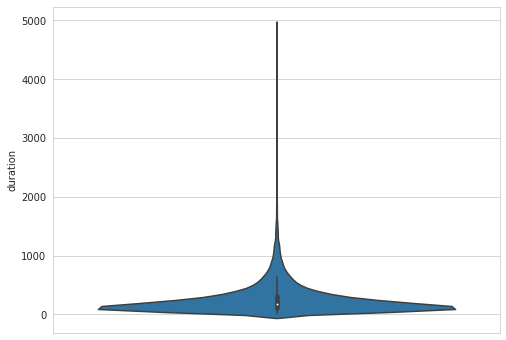

In [ ]:
#Vilion plot for checking the outlires
sns.violinplot(y=bank_df.duration)

In [ ]:
#lets see the % of term deposit acceptance from 0 to 2520 sec each 60 sec slot 
rdu = [] #empty list to store the % result
for i in range(0,2520,60):
  dura = bank_df[(bank_df['duration']>=i) & (bank_df['duration']<i+60)]
  dura_y = 100 * (len(dura[dura['y'] == 'yes'])) / (len(dura))
  rdu.append(dura_y)
  
#Print call duration range and their % of term deposit acceptance  
i = 0 #initial value of duration is 0 year
for j in rdu:
  print(f'The % of acceptance between {i} to {i+60} sec call duration is: {round(j, 2)}')
  i = i + 60

The % of 0 to 60 previous days accept term deposit is: 0.19
The % of 60 to 120 previous days accept term deposit is: 2.11
The % of 120 to 180 previous days accept term deposit is: 5.76
The % of 180 to 240 previous days accept term deposit is: 9.65
The % of 240 to 300 previous days accept term deposit is: 12.51
The % of 300 to 360 previous days accept term deposit is: 14.16
The % of 360 to 420 previous days accept term deposit is: 17.86
The % of 420 to 480 previous days accept term deposit is: 20.15
The % of 480 to 540 previous days accept term deposit is: 25.22
The % of 540 to 600 previous days accept term deposit is: 29.36
The % of 600 to 660 previous days accept term deposit is: 34.73
The % of 660 to 720 previous days accept term deposit is: 43.06
The % of 720 to 780 previous days accept term deposit is: 41.59
The % of 780 to 840 previous days accept term deposit is: 45.43
The % of 840 to 900 previous days accept term deposit is: 53.45
The % of 900 to 960 previous days accept term de

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


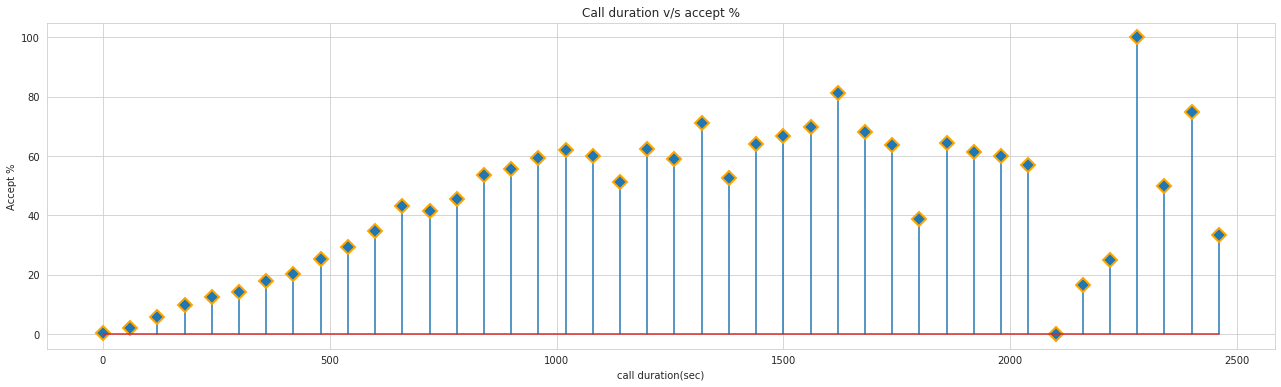

In [ ]:
# create data
x= range(0,2520,60)
value = rdu
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('call duration(sec)')
plt.ylabel('Accept %')
plt.title('Call duration v/s accept %')
plt.show()

#<b> PairPlot

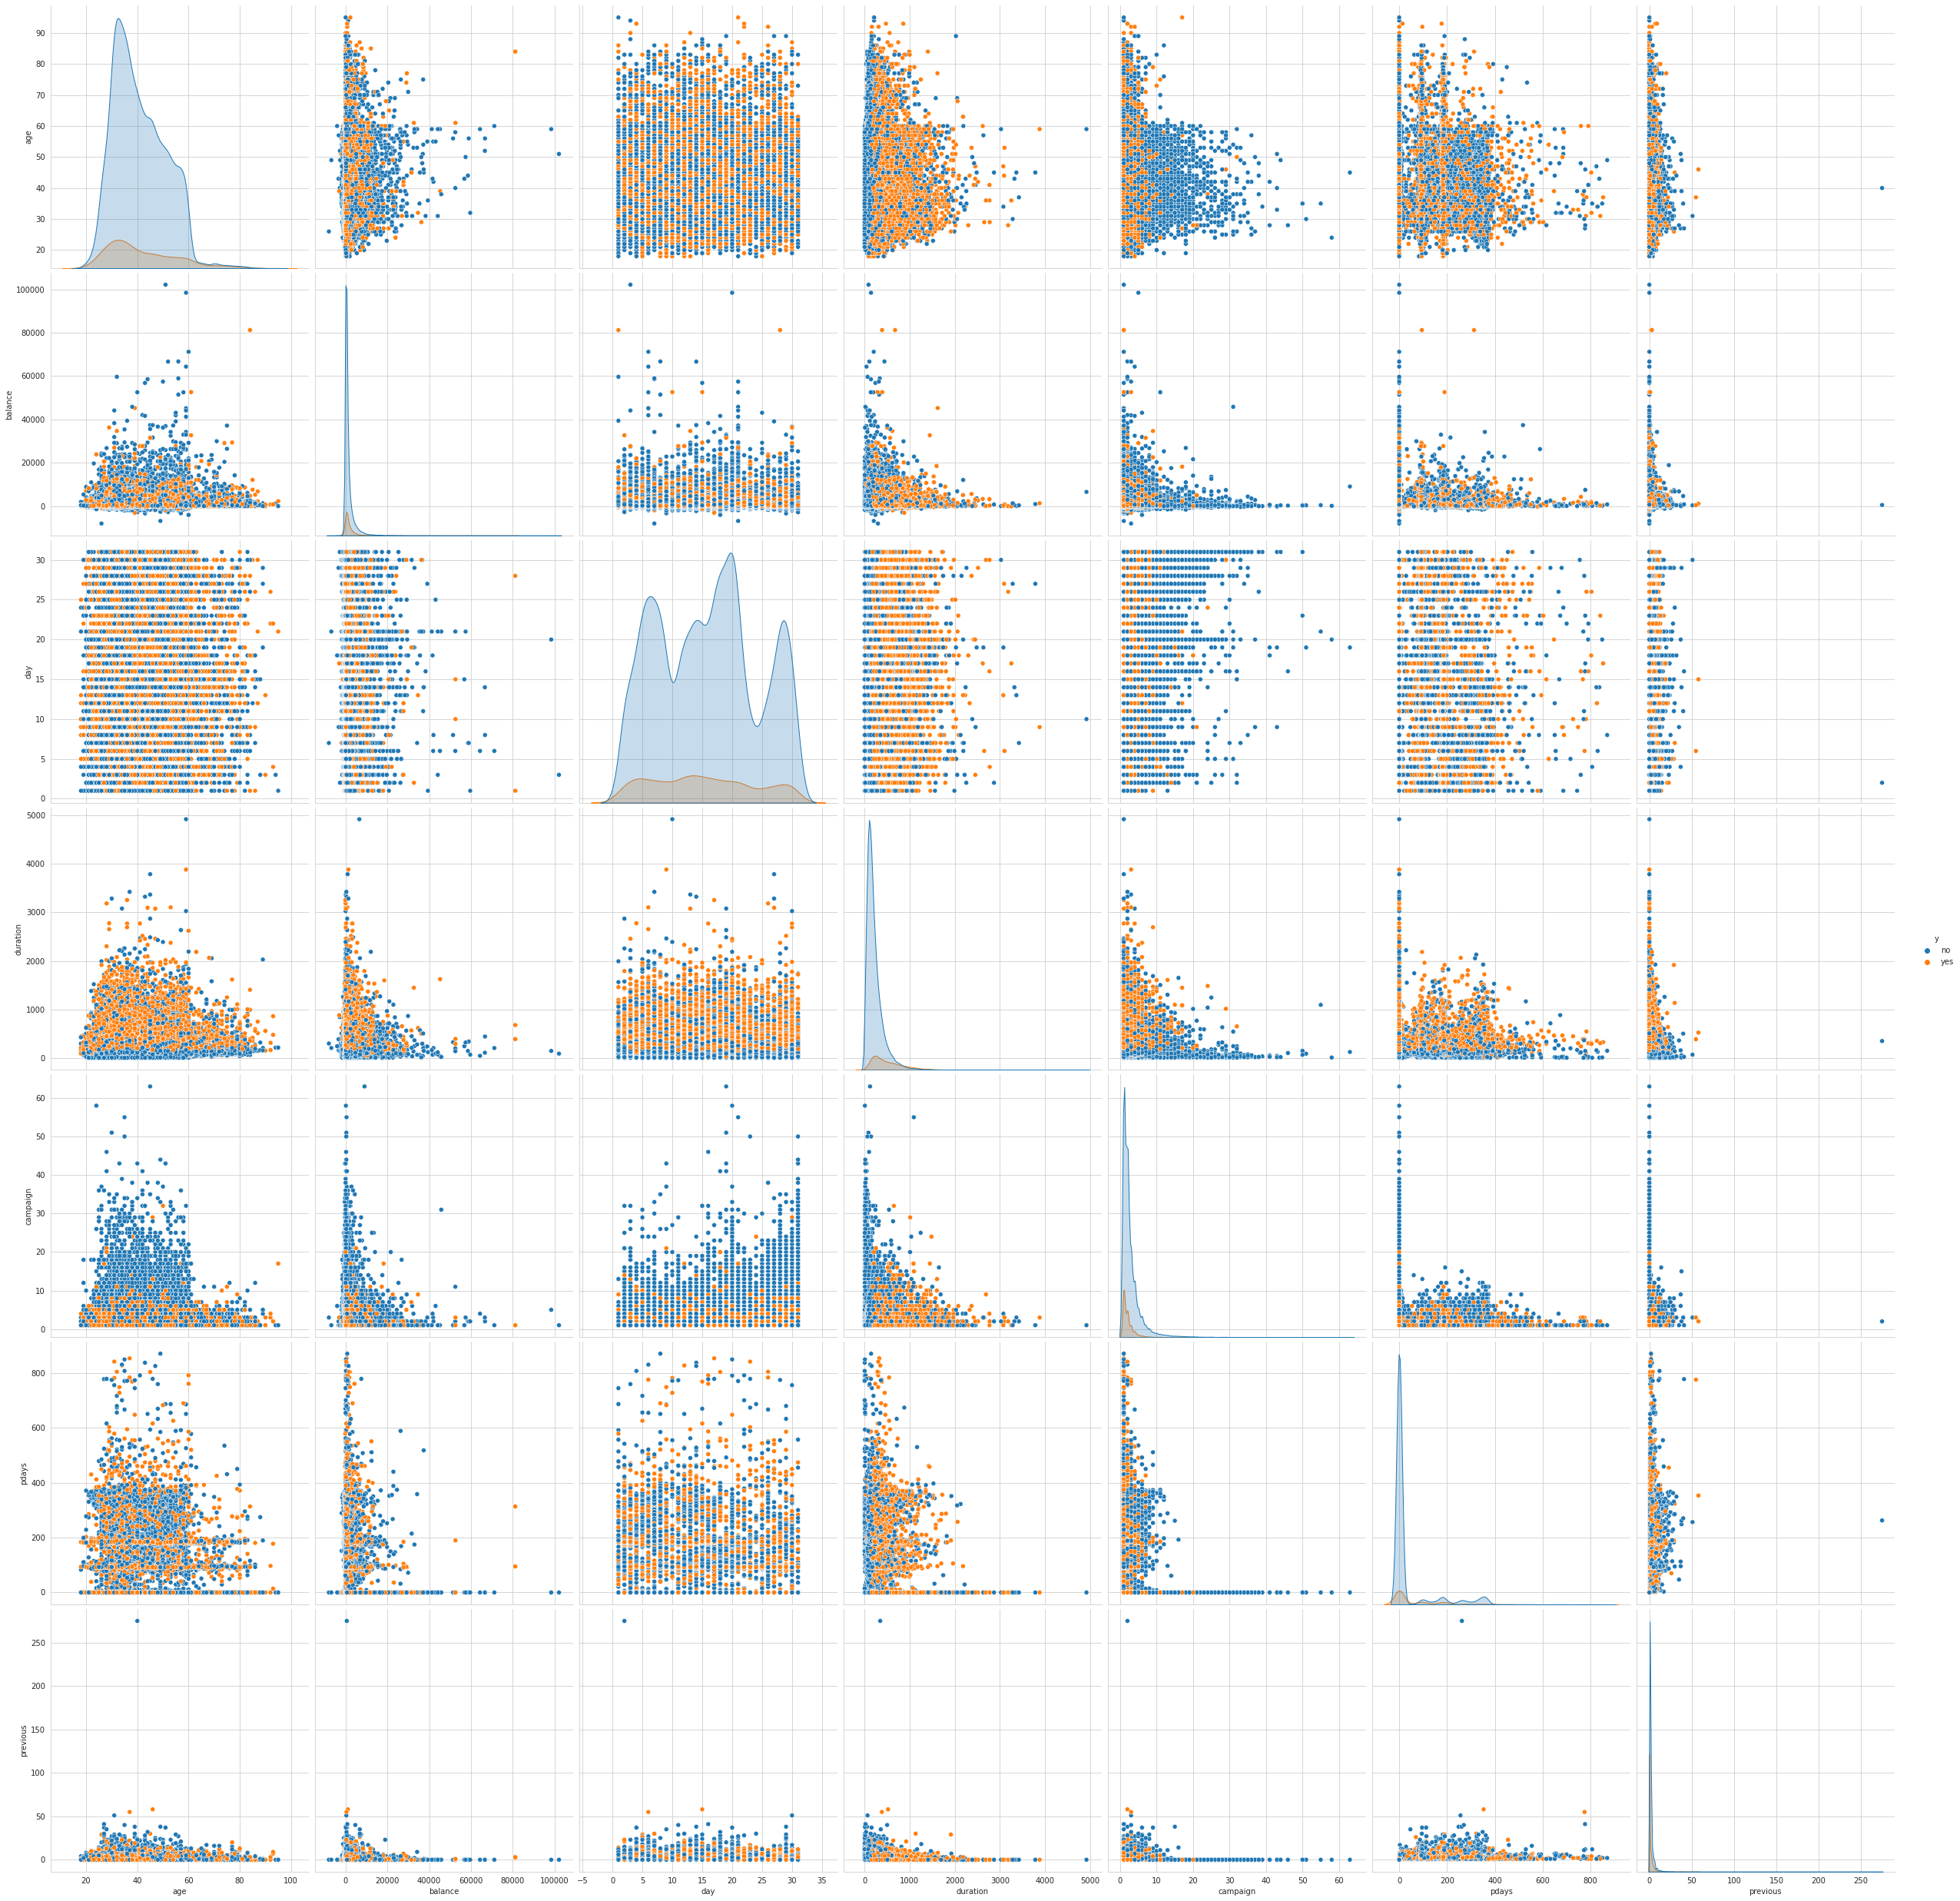

In [ ]:
sns.pairplot(bank_df, hue='y', height=5)

Text(0.5, 1.0, 'Number of call in current campaign v/s Call Duration')

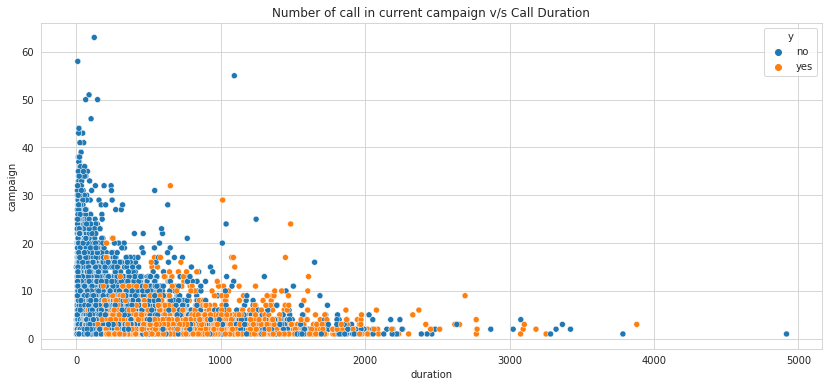

In [ ]:
#Lets try to find some more insights 
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.campaign, hue = bank_df.y)
plt.title('Number of call in current campaign v/s Call Duration')

Text(0.5, 1.0, 'Customer Balance v/s Call Duration')

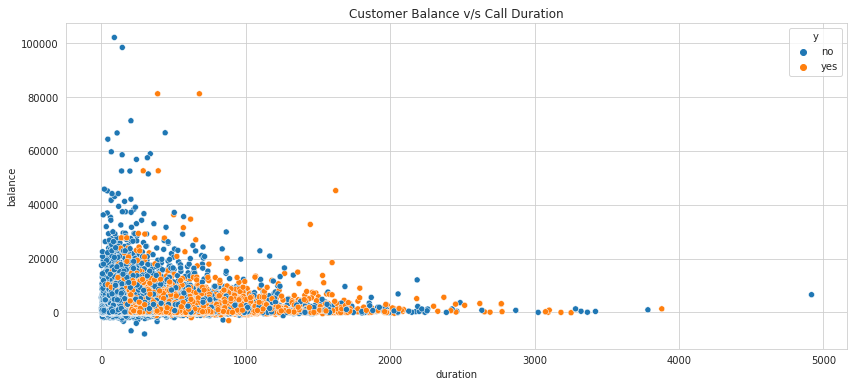

In [ ]:
#Scatter plot visulization
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.balance, hue = bank_df.y)
plt.title('Customer Balance v/s Call Duration')

Text(0.5, 1.0, 'Number of call in current campaign v/s Customer age')

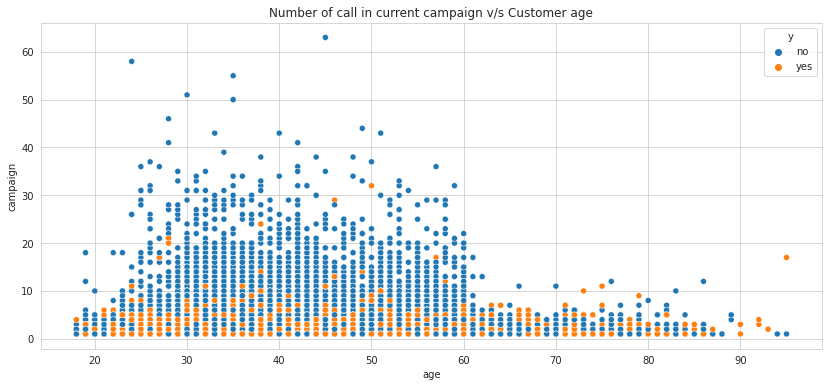

In [ ]:
#Representing the term deposit variation
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.age, y= bank_df.campaign, hue = bank_df.y)
plt.title('Number of call in current campaign v/s Customer age')

Text(0.5, 1.0, 'Customer age v/s Pdays')

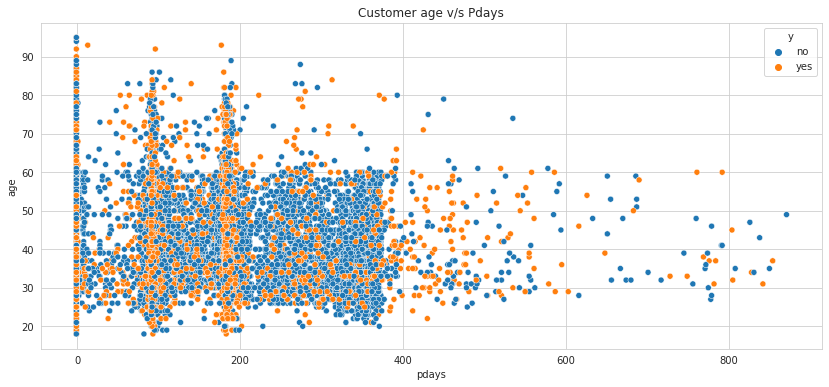

In [ ]:
#representing the term deposit variation
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.pdays, y= bank_df.age, hue = bank_df.y)
plt.title('Customer age v/s Pdays')

#<b>Scatter Plot among Numerical and Categorical feature

In [ ]:
numerical = ['age',	'balance',	'campaign',	'pdays',	'previous']
categorical = ['job','marital','education','default','housing',	'loan',	'contact',	'month',	'poutcome']

#Total numbers of plots = 5x9 = 45

<Figure size 1008x432 with 0 Axes>

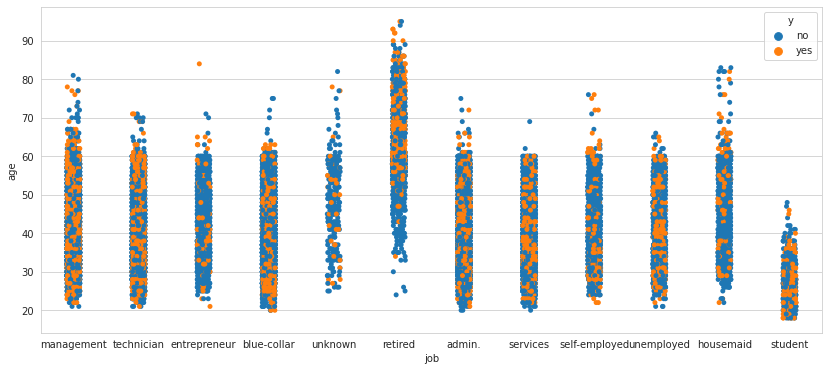

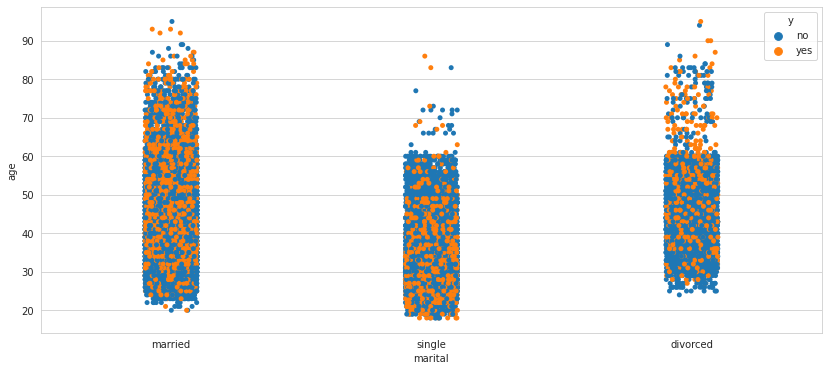

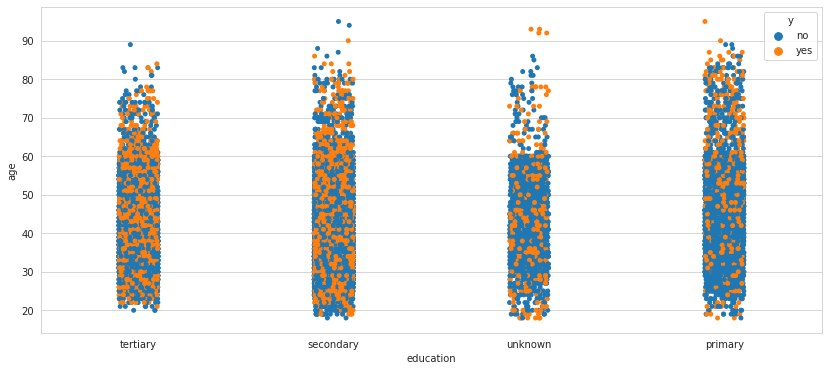

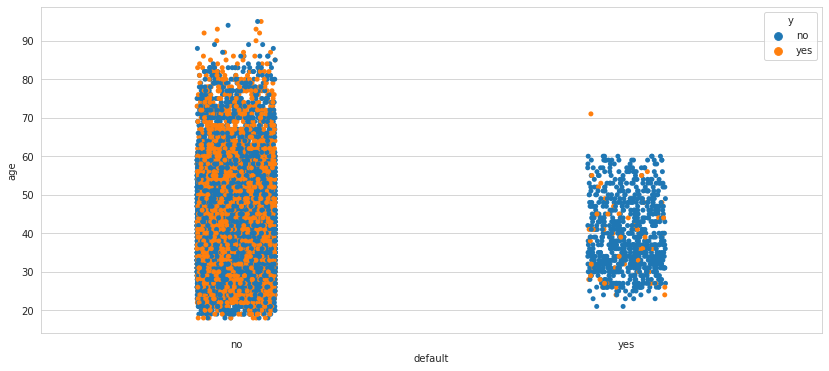

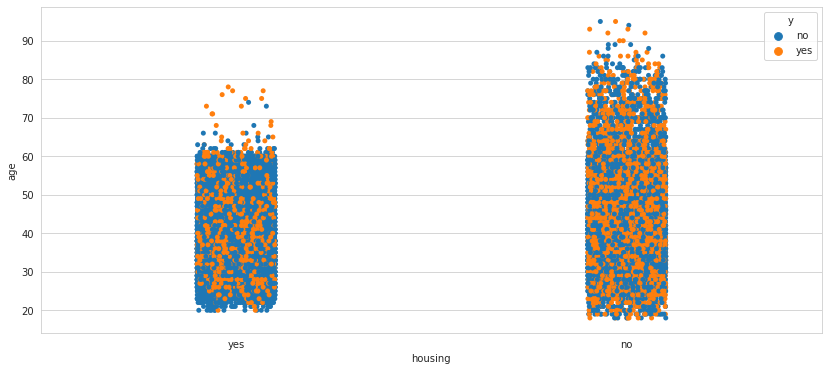

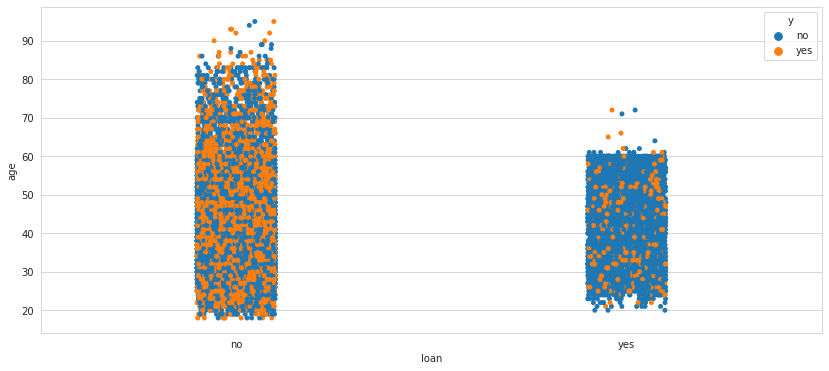

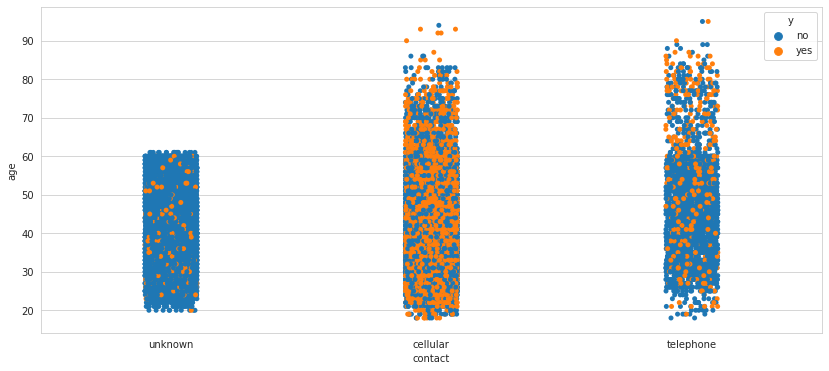

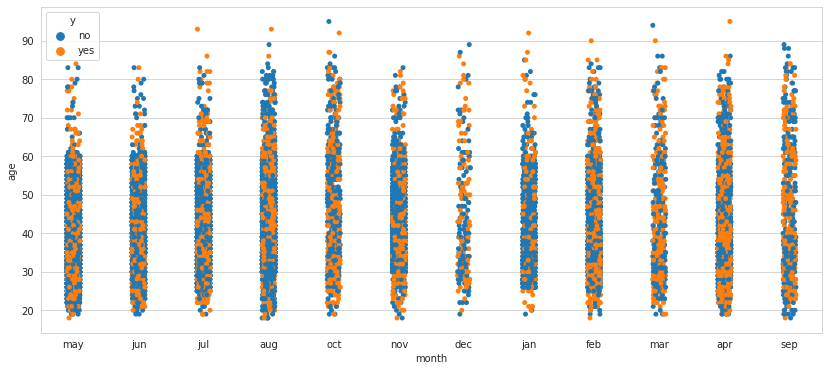

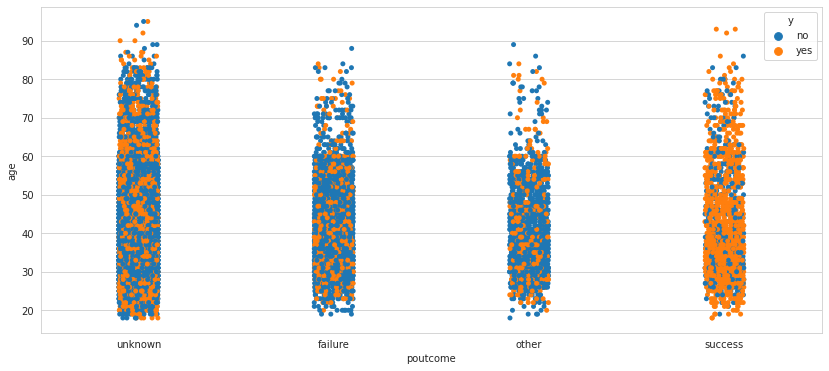

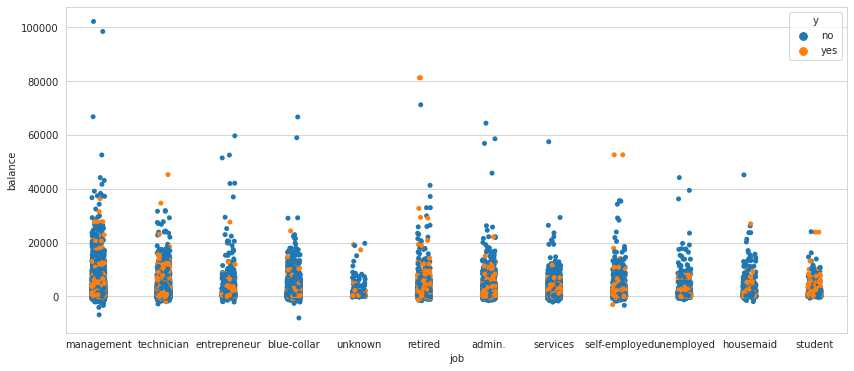

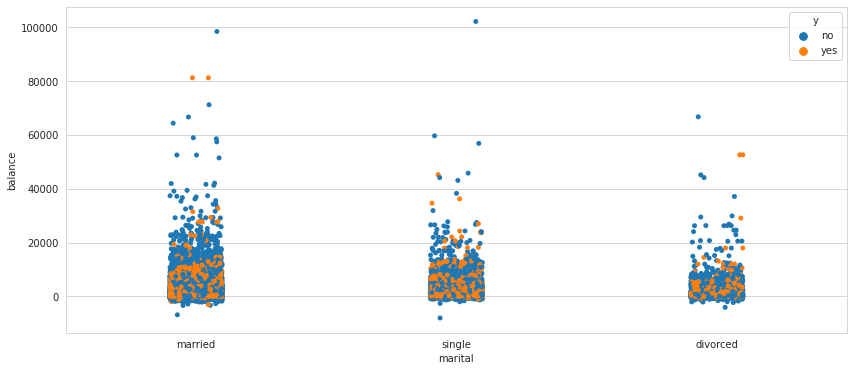

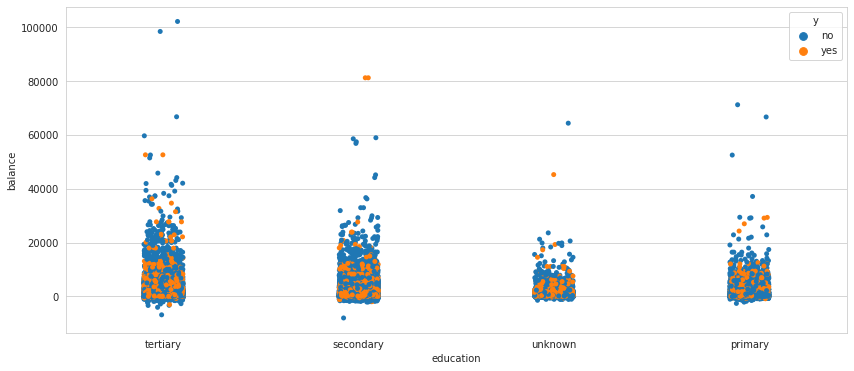

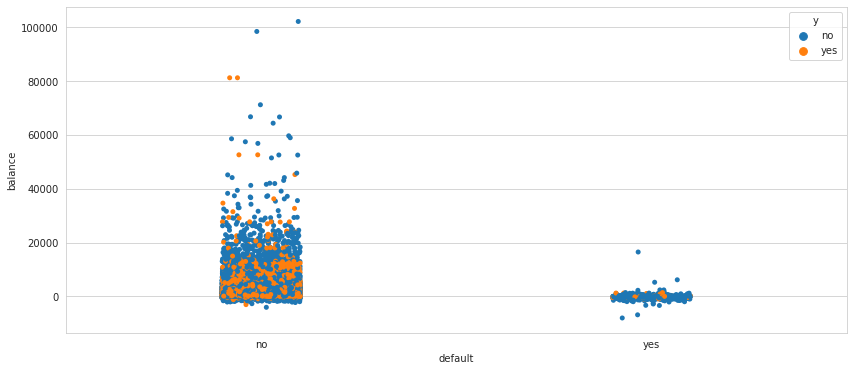

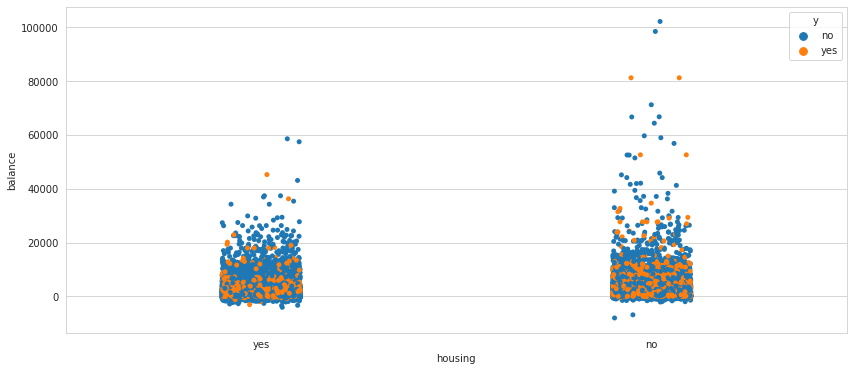

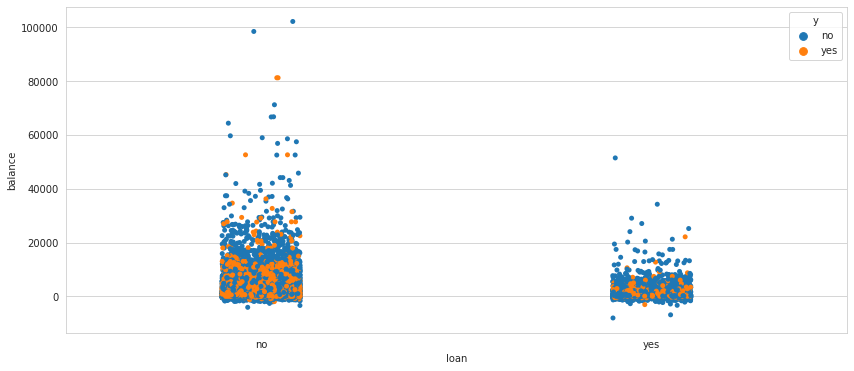

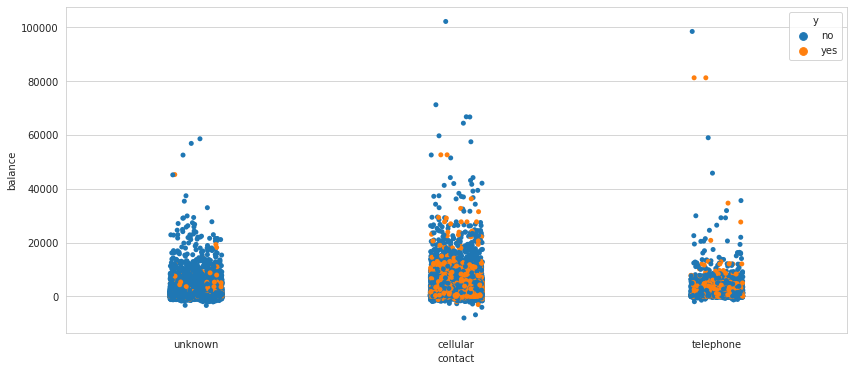

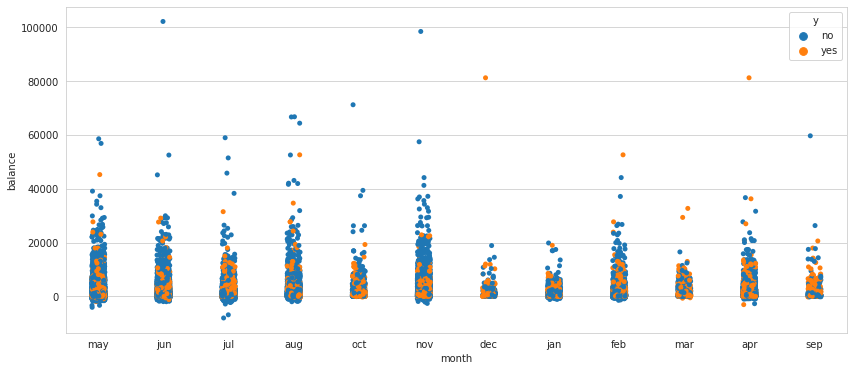

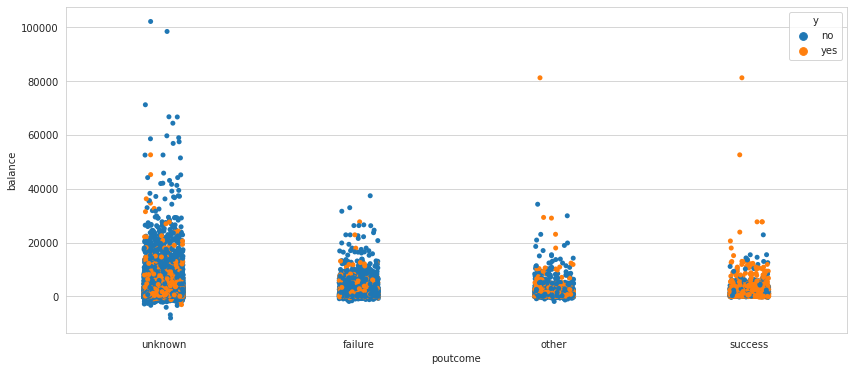

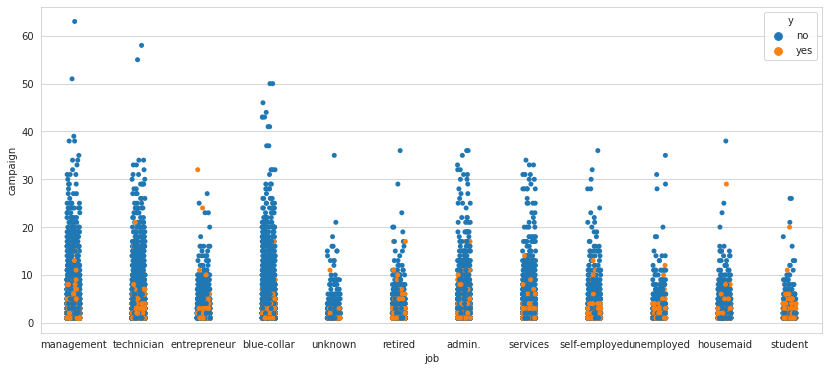

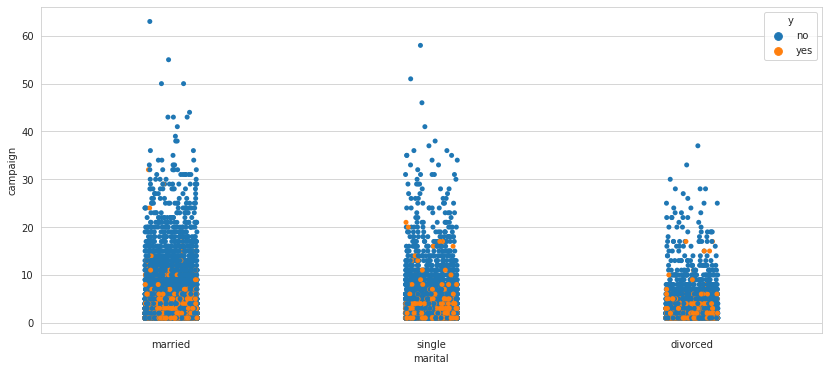

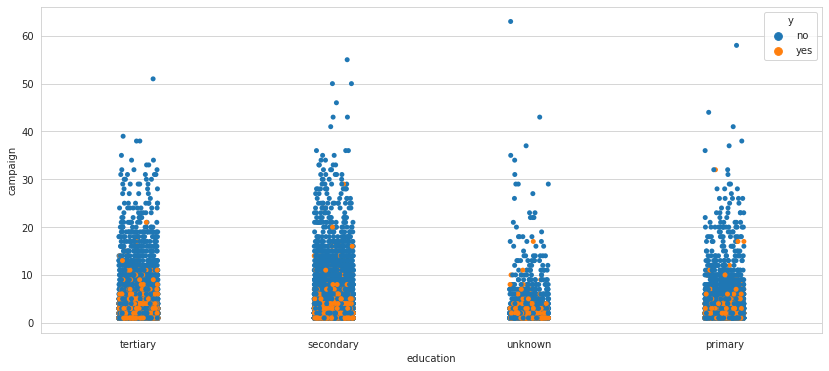

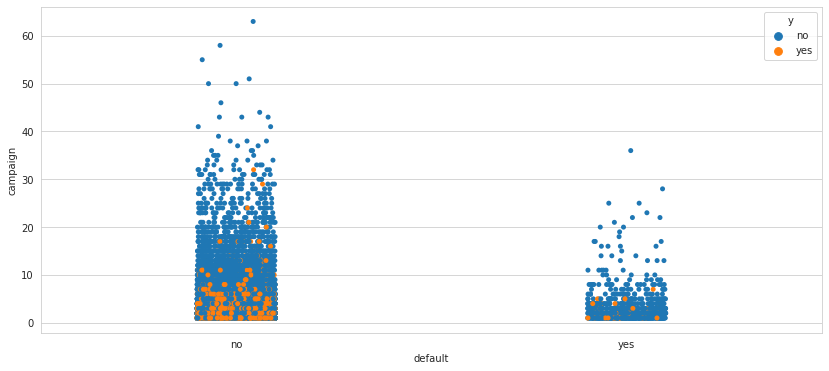

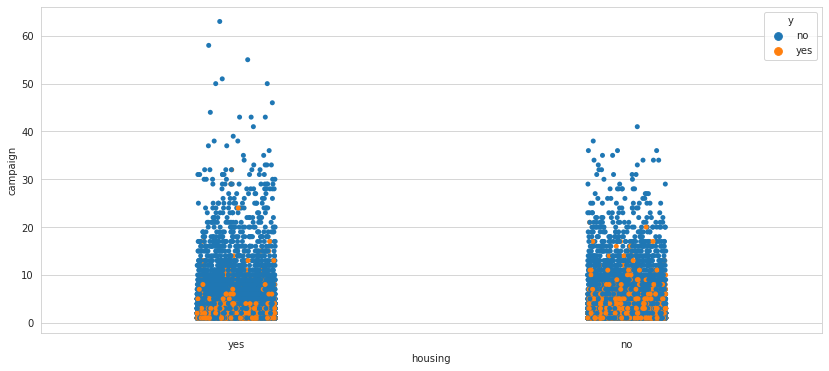

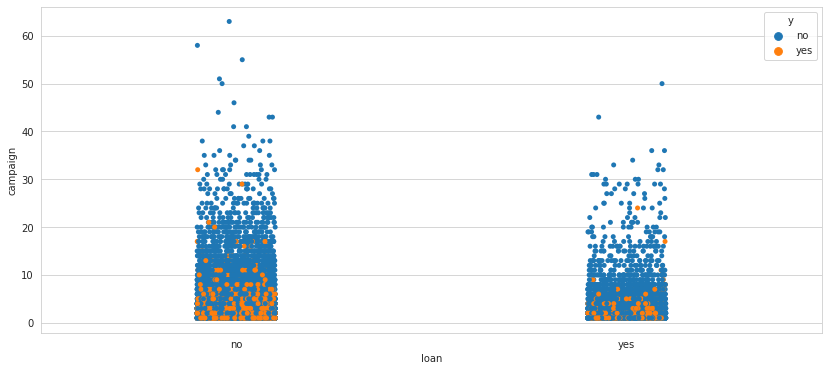

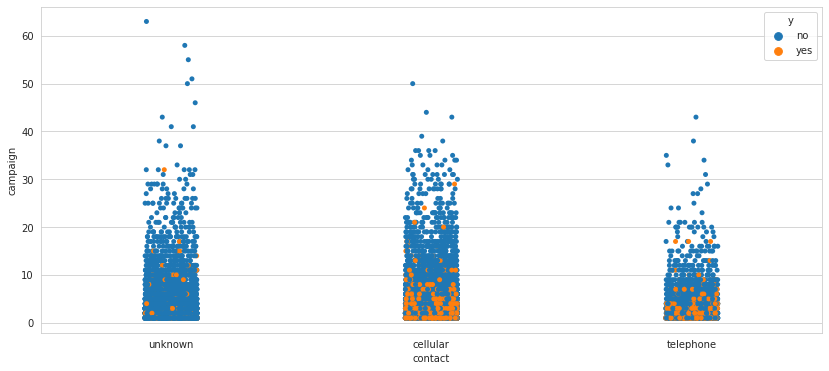

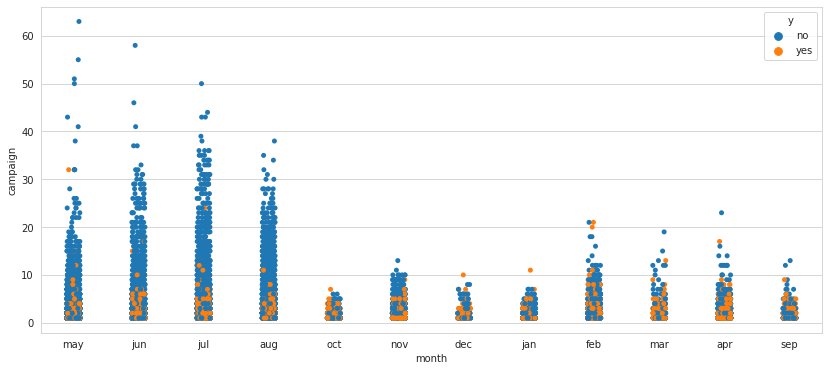

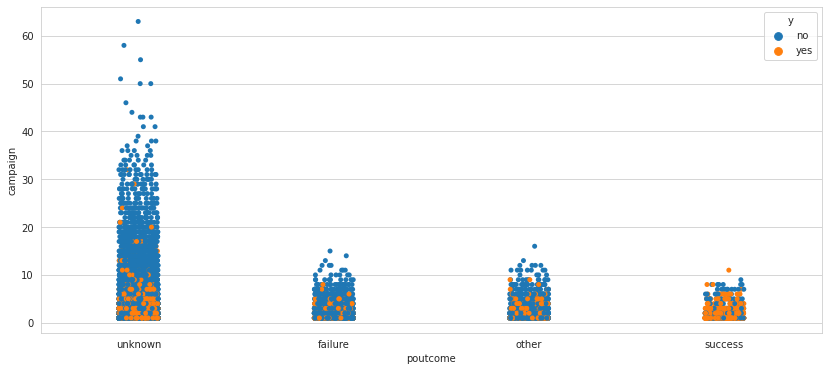

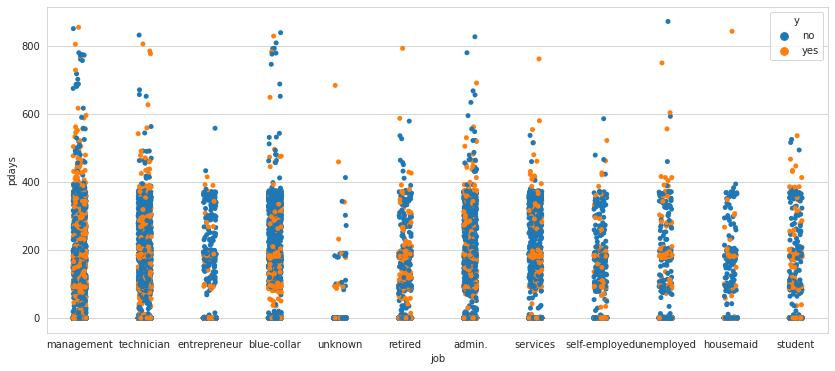

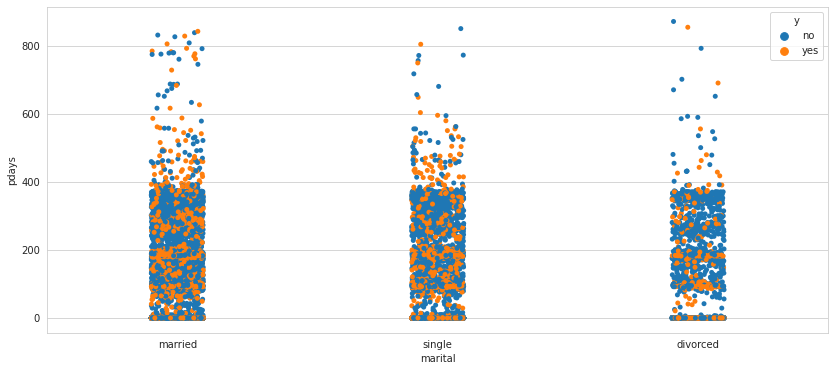

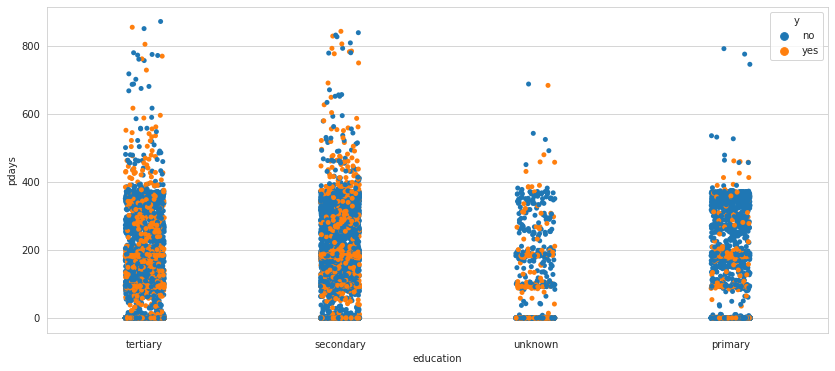

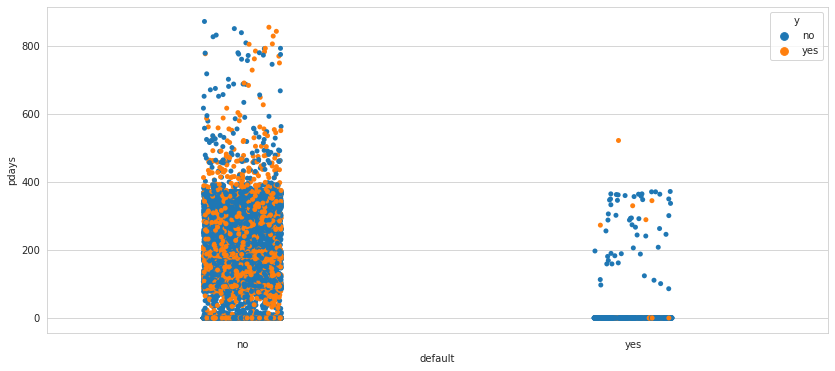

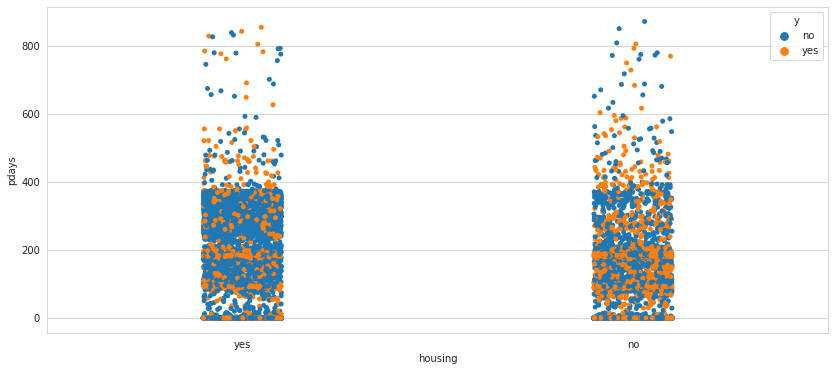

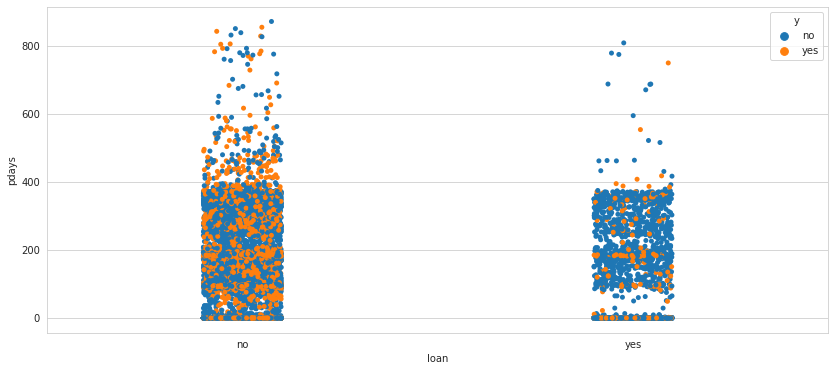

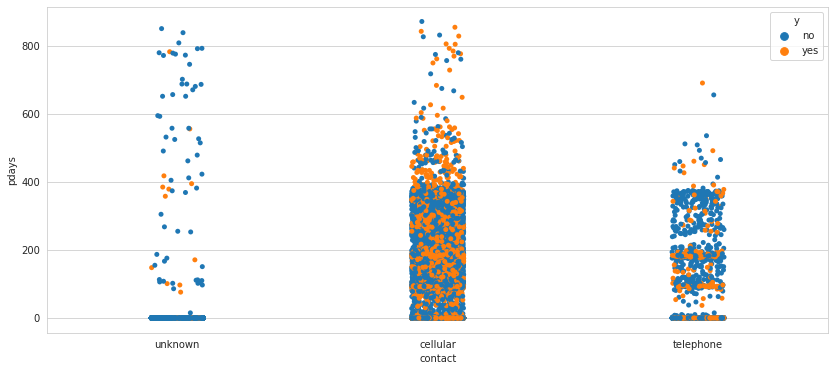

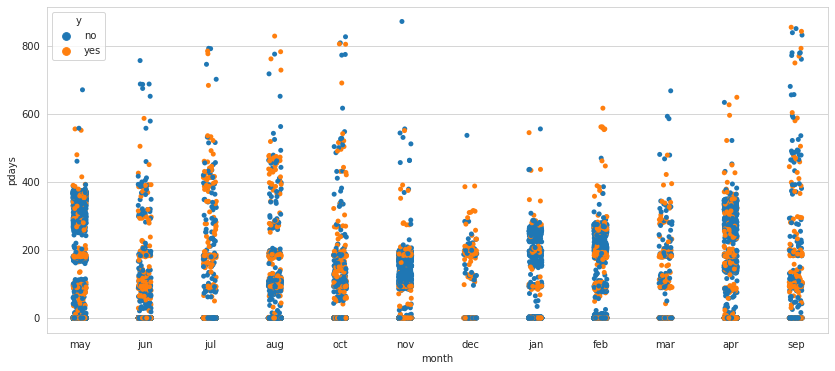

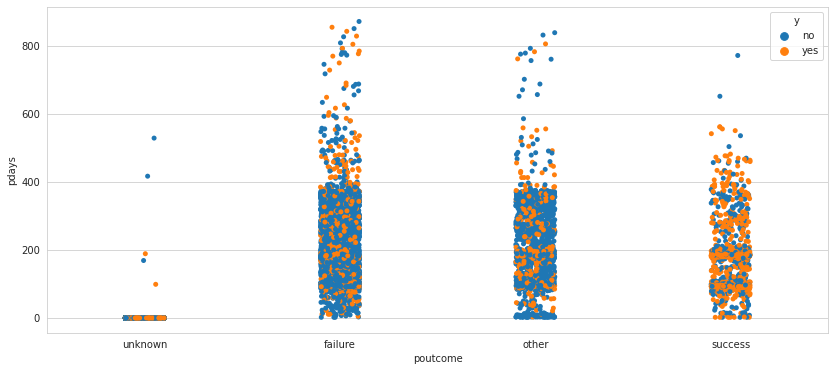

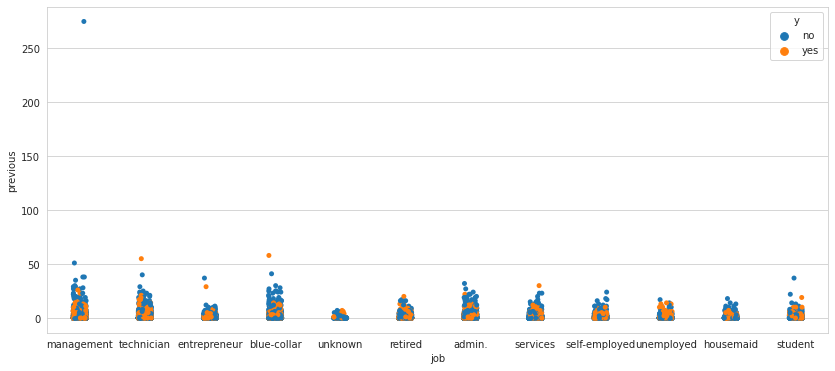

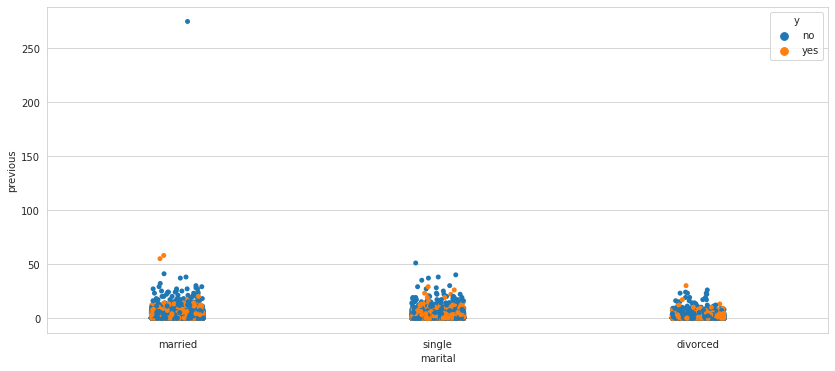

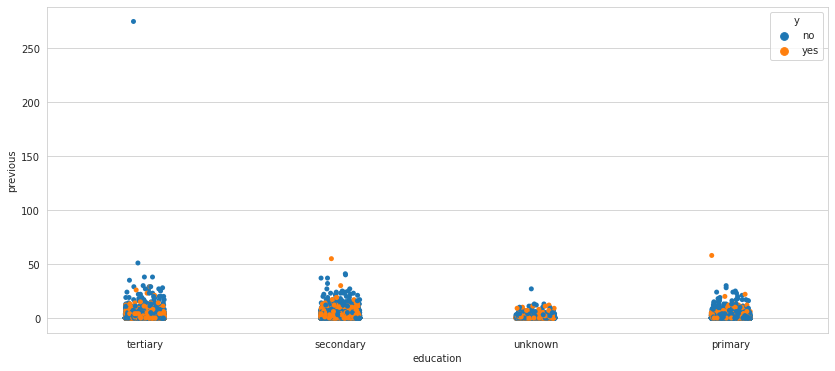

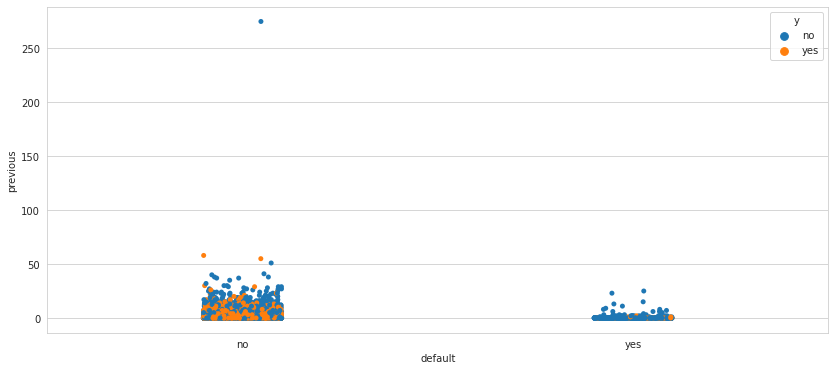

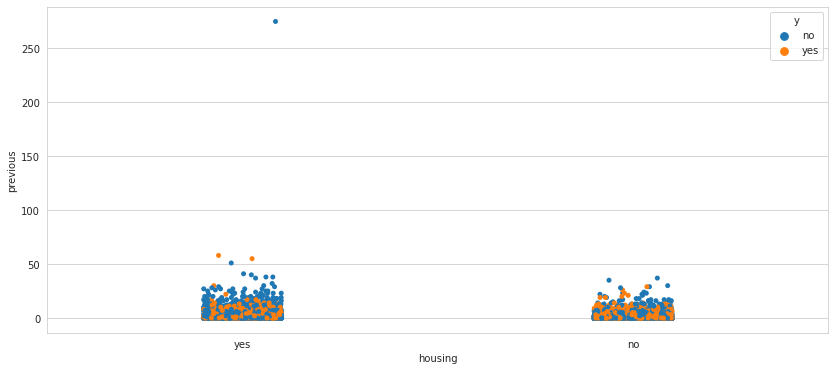

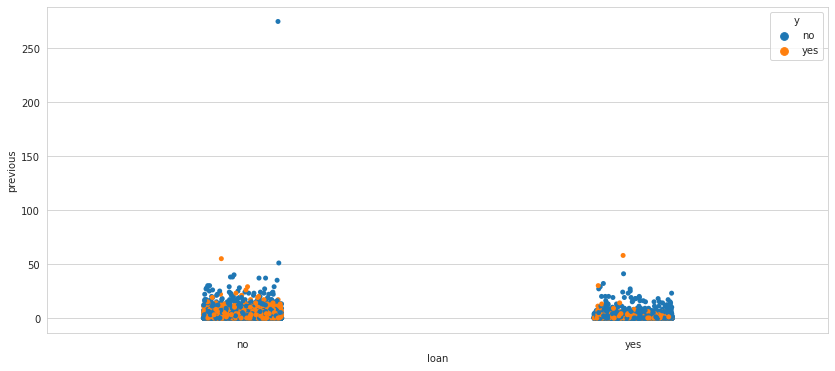

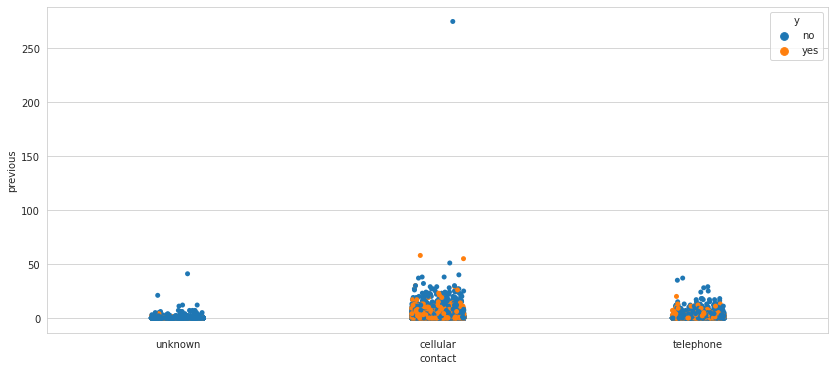

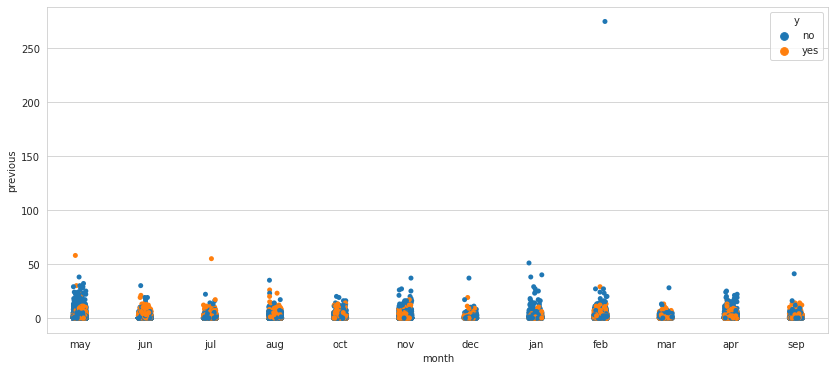

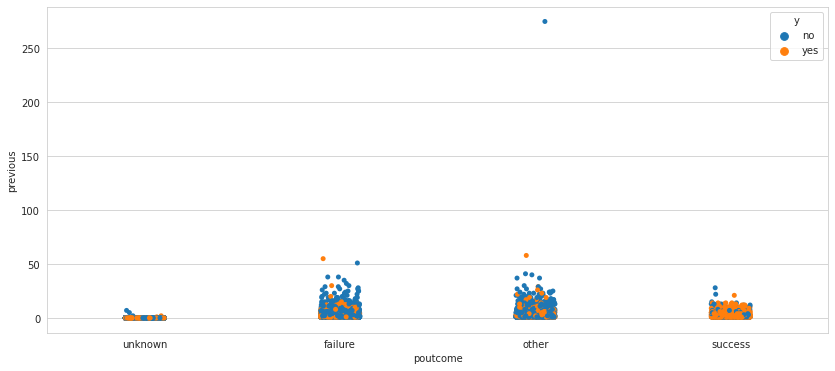

In [ ]:
plt.figure(figsize=(14,6))
for num in numerical:
  for cat in categorical:
    plt.figure(figsize=(14,6))
    sns.stripplot(x= cat, y=num, hue="y", data=bank_df)
    plt.show()

#Feature Engineering

In [ ]:
nbdf = bank_df.copy()

In [ ]:
nbdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

#Outlires

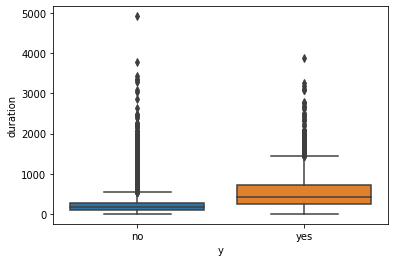

In [ ]:
sns.boxplot(y='duration',x="y", data= nbdf)

In [ ]:
#Removing outlires from call duration
nbdf = nbdf[~((nbdf['duration']>2000) & (nbdf['y'] == 'no'))]

#Removing outlires from campaign
nbdf = nbdf[~(nbdf['campaign']>20)]

#Removing outlires from previous
nbdf = nbdf[~(nbdf['previous']>11)]

In [ ]:
nbdf.describe()

age        balance           day      duration      campaign  \
count  44709.000000   44709.000000  44709.000000  44709.000000  44709.000000   
mean      40.947505    1362.302221     15.775414    257.698226      2.627704   
std       10.618520    3044.317494      8.305137    250.110323      2.464511   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    181.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   3881.000000     20.000000   

             pdays      previous  
count  44709.00000  44709.000000  
mean      39.47080      0.489767  
std       99.30895      1.370099  
min       -1.00000      0.000000  
25%       -1.00000      0.000000  
50%       -1.00000      0.000000  
75%       -1.00000      0.000000  
max      871.00000     11.000000

#Converting some discrete variable into categorical variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


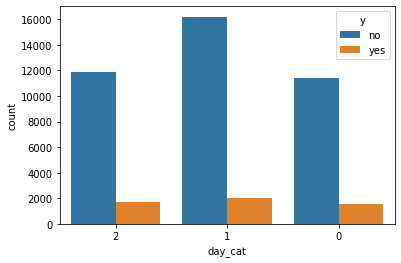

In [ ]:
#DAY
# We dividing day (discrete variable) feature in three parts and convert into categorical feature 
# Creating a function
def replace_day_value(day):
  '''this function is used to  limit the value within the range'''
  if day < 11: #below 11 set value 2
    day = '2'
  elif day < 21:  #more that 10 and below 21 set value 1
    day = '1'
  else:
    day = '0' # others set 0
  return day

#DAY
# function call for the day store it into new column day_cat
nbdf['day_cat'] = nbdf['day'].apply(replace_day_value)

#checking the result plotting barplot
sns.countplot(nbdf['day_cat'], hue = nbdf.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


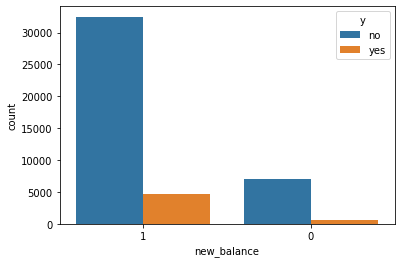

In [ ]:
#Balance
# We dividing balance (continous variable) feature in two parts and convert into categorical feature 
# Creating a function
def replace_balance_value(balance):
  '''this function is used to  limit the value within the range'''
  if balance < 1:  #below 1 set value 0
    balance = '0'
  elif balance < 15000:   #more that 0 and below 15000 set value 1
    balance = '1'
  else:
    balance = '0'   # others set 0
  return balance

# function call for the balance and store it into new column new_balance
nbdf['new_balance'] = nbdf['balance'].apply(replace_balance_value)

#checking the result plotting barplot
sns.countplot(nbdf['new_balance'], hue = nbdf.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


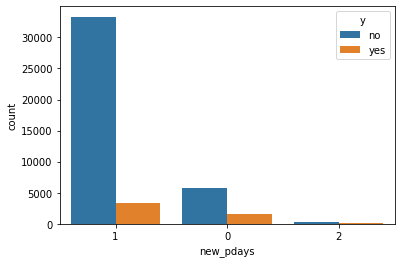

In [ ]:
#PDAYS
# We dividing pdays feature in three parts and convert into categorical feature 
# Creating a function
def replace_pdays_value(pdays):
  '''this function is used to  limit the value within the range'''
  if ((pdays > 97) & (pdays < 103)):      #more that 97 and below 103 set value 2
    pdays = '2'
  elif ((pdays > 196) & (pdays < 204)):      #more that 196 and below 204 set value 2
    pdays = '2'
  elif pdays > 400:   #more than 400 set value 2
    pdays = '2'
  elif pdays <0:   #below 0 set value 1
    pdays = '1'
  else:
    pdays = '0'   # others set 0
  return pdays

# call function for the pdays and store it into new column new_pdays
nbdf['new_pdays'] = nbdf['pdays'].apply(replace_pdays_value)

#checking change plotting barplot
sns.countplot(nbdf['new_pdays'], hue = nbdf.y)

In [ ]:
nbdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

  day_cat new_balance new_pdays  
0       2           1         1  
1       2           1         1  
2       2           1         1  
3       2           1         1  
4       2           1         1

#Reducing JOB categories

admin+services = adms

enterpenure + selfemployed + unemployed + unknown + housemade = others

retired + student = rstd

In [ ]:
print(nbdf.job.nunique())
nbdf.job.unique()

12


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#Creating dictionary of different job type
job_dict = {'entrepreneur': 'others', 'unknown':'others', 'retired':'rstd', 'admin.':'adms', 'services':'adms',
            'self-employed':'others','unemployed':'others', 'housemaid':'others', 'student':'rstd', 'management':'management',
            'technician':'technician', 'blue-collar':'blue-collar'}

#creating new column new_job after maping
nbdf['new_job'] = nbdf.job.map(job_dict)

print(nbdf.new_job.nunique())
nbdf.new_job.unique()

In [ ]:
nbdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... duration  campaign  pdays  previous  poutcome   y  \
0  unknown    5  ...      261         1     -1         0   unknown  no   
1  unknown    5  ...      151         1     -1         0   unknown  no   
2  unknown    5  ...       76         1     -1         0   unknown  no   
3  unknown    5  ...       92         1     -1         0   unknown  no   
4  unknown    5  ...      198         1     -1         0   unknown  no   

  day_cat new_balance new_pdays      new_job  
0       2           1         1   management  
1       2           1         1   technician  
2       2           1         1       others  
3       2           1         1  blue-collar  
4       2           1         1       others  

[5 rows x 21 columns]

In [ ]:
pd.DataFrame(nbdf.groupby('new_job')['y'].value_counts(normalize= True)).T

new_job      adms           blue-collar           management            \
y              no       yes          no       yes         no       yes   
y        0.892443  0.107557    0.926966  0.073034   0.861696  0.138304   

new_job    others                rstd           technician          
y              no       yes        no       yes         no     yes  
y        0.889231  0.110769  0.754331  0.245669     0.8892  0.1108

In [ ]:
#Creating dictionary of different job type from new_job
job_dict_o = {'adms':2,	'blue-collar':1,	'management':5,	'others':3,	'rstd':6,	'technician':4}

#creating new column new_job_o after maping
nbdf['new_job_o'] = nbdf.new_job.map(job_dict_o)

print(nbdf.new_job_o.nunique())
nbdf.new_job_o.unique()

6


array([5, 4, 3, 1, 6, 2])

In [ ]:
print(nbdf.shape[1])
nbdf.columns

22


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'day_cat', 'new_balance', 'new_pdays',
       'new_job', 'new_job_o'],
      dtype='object')

In [ ]:
#Features selection after removing outlires and creting some new feature (inplace of old feature)
all_feature = ['age',  'marital', 'education', 'default', 'housing','loan', 'contact',  'month', 'campaign',
              'duration',  'poutcome', 'day_cat', 'new_balance', 'new_pdays','new_job_o']  #(inplace of old feature) 


#all independent feature with values
all_fet_value = nbdf[all_feature]   

# Get dummies of selected independent feature
all_fet_dumy = pd.get_dummies(all_fet_value,drop_first=True)

In [ ]:
#Feature count and name after one hot encoding
print(all_fet_dumy.shape[1])
all_fet_dumy.columns

33


Index(['age', 'campaign', 'duration', 'new_job_o', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'day_cat_1', 'day_cat_2',
       'new_balance_1', 'new_pdays_1', 'new_pdays_2'],
      dtype='object')

#<b>Correlation Analysis

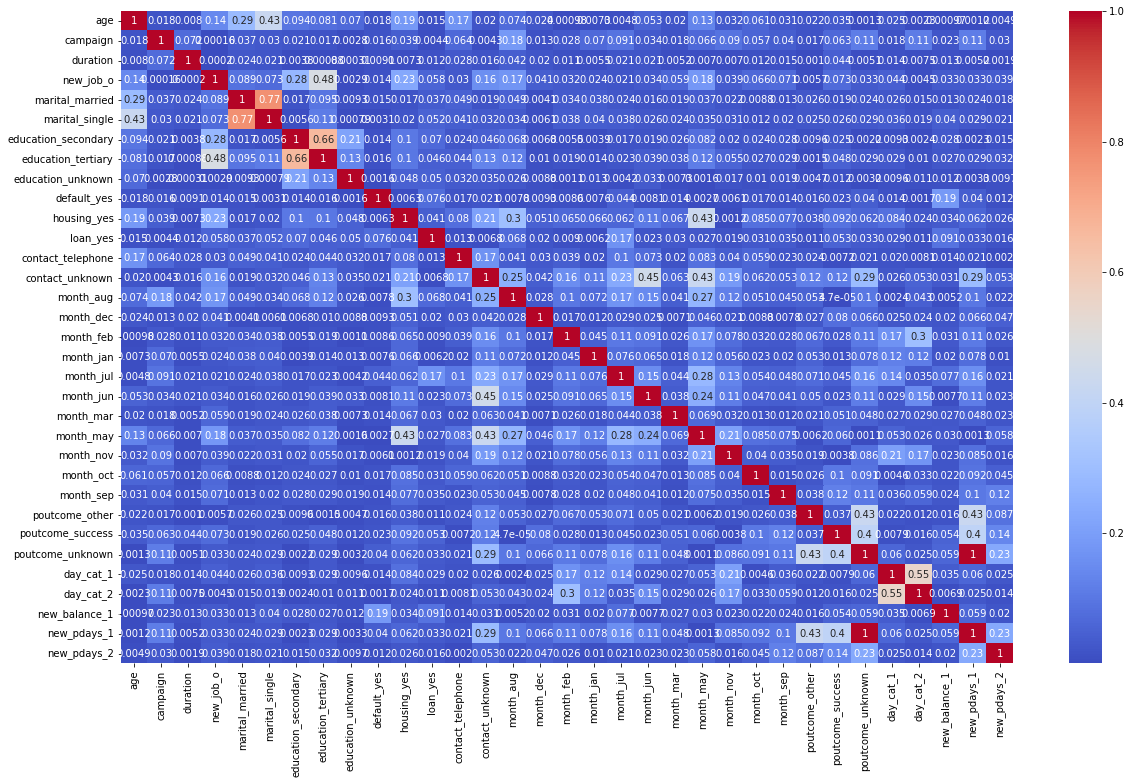

In [ ]:
# Lets see correlation graph after one hot encoding
plt.figure(figsize=(20,12))
correlation = all_fet_dumy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#<b>Prepairing Dataset for Modeling

In [ ]:
all_fet_dumy.columns

Index(['age', 'campaign', 'duration', 'new_job_o', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'day_cat_1', 'day_cat_2',
       'new_balance_1', 'new_pdays_1', 'new_pdays_2'],
      dtype='object')

In [ ]:
# Lets Drop he features which are havinh high colinearioty with each other ( More than 0.6)
independent_variables =  ['age',  'duration', 'new_job_o', 'campaign',
       'marital_single', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'day_cat_2',
       'new_balance_1', 'new_pdays_2']


dependent_variables = 'y'

In [ ]:
# Create the data of independent variables
X = all_fet_dumy[independent_variables]

# Create the dependent variable data
y = pd.get_dummies(nbdf[dependent_variables], drop_first=True)

In [ ]:
#Calculating feature score using chi2 test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
#Checking feature score using chi2 test
featureScores.sort_values(by='Score',ascending=False)

Specs         Score
1             duration  1.810161e+06
24    poutcome_success  4.062566e+03
18           month_mar  7.485953e+02
21           month_oct  7.420795e+02
11     contact_unknown  7.275358e+02
22           month_sep  6.534531e+02
3             campaign  5.793051e+02
2            new_job_o  4.292511e+02
28         new_pdays_2  4.102862e+02
8          housing_yes  3.878639e+02
19           month_may  3.295565e+02
13           month_dec  2.522251e+02
25    poutcome_unknown  2.241828e+02
9             loan_yes  1.739858e+02
5   education_tertiary  1.415683e+02
4       marital_single  1.302971e+02
0                  age  7.557360e+01
14           month_feb  6.242209e+01
23      poutcome_other  4.393254e+01
16           month_jul  4.314808e+01
27       new_balance_1  3.025154e+01
7          default_yes  2.143474e+01
17           month_jun  1.106232e+01
26           day_cat_2  1.013710e+01
20           month_nov  9.580327e+00
10   contact_telephone  8.757795e+00
6    education_unknown  6.749222e+00
12           month_aug  3.059718e+00
15           month_jan  2.839269e+00

In [ ]:
#loading required libraries and performing train test split by 70-30 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = y)
print('train features shape:',x_train.shape)
print('test features shape:',x_test.shape)
print('train label shape:',y_train.shape)
print('test label shape:',y_test.shape)

train features shape: (31296, 29)
test features shape: (13413, 29)
train label shape: (31296, 1)
test label shape: (13413, 1)


#Handling Imbalance data Using SMOTE

In [ ]:
print("Before OverSampling, counts: Features {} and Label {}".format(x_train.shape,y_train.shape)) 
print("{}".format(y_train.value_counts())) 
print("{}".format(y_test.value_counts())) 
#import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 64) 
x_train_os, y_train_os = sm.fit_resample(x_train, y_train) 
  
print("After OverSampling, counts: Features {} and Label {}".format(x_train_os.shape,y_train_os.shape)) 
print("{}".format(y_train_os.value_counts())) 

Before OverSampling, counts: Features (31296, 29) and Label (31296, 1)
yes
0      27624
1       3672
dtype: int64
yes
0      11839
1       1574
dtype: int64
After OverSampling, counts: Features (55248, 29) and Label (55248, 1)
yes
0      27624
1      27624
dtype: int64


In [ ]:
#performing standard scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#without oversample
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#with oversample
x_train_f = scaler.fit_transform(x_train_os)

In [ ]:
# Lets define a function for Evaluation metrics so that we can reuse it again and again
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)

#<b>Models

Logistic, KNN, Random Forest, XGBoost,LGBM, CatBoost, ANN

#<b>Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train_f,y_train_os)
#log_reg.fit(x_train,y_train)
cv_score = cross_val_score(log_reg,x_train_f,y_train_os,cv=5)

y_pred_log_reg=log_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_log_reg,'LogisticRegression')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross_validation score [0.73945701 0.93782805 0.93864253 0.9373699  0.93755091]
LogisticRegression Test accuracy Score 0.6519048684112428
              precision    recall  f1-score   support

           0       0.99      0.61      0.76     11839
           1       0.24      0.94      0.39      1574

    accuracy                           0.65     13413
   macro avg       0.62      0.78      0.57     13413
weighted avg       0.90      0.65      0.71     13413



array([[7268, 4571],
       [  98, 1476]])

#<b>K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_f,y_train_os)
cv_score = cross_val_score(knn,x_train_f,y_train_os,cv=5)

y_pred_knn=knn.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Cross_validation score [0.74580298 0.94773519 0.94488438 0.94884384 0.94797276]
KNN Test accuracy Score 0.8418698277790203
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7893
           1       0.39      0.64      0.49      1049

    accuracy                           0.84      8942
   macro avg       0.67      0.75      0.70      8942
weighted avg       0.88      0.84      0.86      8942



array([[6859, 1034],
       [ 380,  669]])

#<b>Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(x_train_f,y_train_os)
cv_score = cross_val_score(rf_reg,x_train_f,y_train_os,cv=5)

y_pred_rf=rf_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.80194805 0.92667089 0.93284764 0.92579981 0.92532468]
RandomForest Test accuracy Score 0.81983896220085
              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7893
         yes       0.37      0.80      0.51      1049

    accuracy                           0.82      8942
   macro avg       0.67      0.81      0.70      8942
weighted avg       0.90      0.82      0.85      8942



array([[6495, 1398],
       [ 213,  836]])

#<b>XGBoost

In [ ]:
#loading libraries
from xgboost import XGBClassifier

xg_reg = XGBClassifier(learning_rate = 0.1, max_depth =5, n_estimators = 100, )
xg_reg.fit(x_train_f,y_train_os)
cv_score = cross_val_score(xg_reg,x_train_f,y_train_os,cv=5)

y_pred_xg=xg_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_xg,'XGBOOST')

Cross_validation score [0.76924295 0.94298385 0.94464682 0.94496357 0.94266709]
XGBOOST Test accuracy Score 0.8325877879668978
              precision    recall  f1-score   support

          no       0.97      0.83      0.90      7893
         yes       0.40      0.82      0.53      1049

    accuracy                           0.83      8942
   macro avg       0.68      0.83      0.72      8942
weighted avg       0.90      0.83      0.86      8942



array([[6589, 1304],
       [ 193,  856]])

#<b>LGBM

In [ ]:
!pip install lightgbm

In [ ]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.09, max_depth= 25, n_estimators= 50)

lgbm.fit(x_train_f,y_train_os)
cv_score = cross_val_score(lgbm,x_train_f,y_train_os,cv=5)

y_pred_lgbm = lgbm.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Cross_validation score [0.77900452 0.9438009  0.94280543 0.94289076 0.94162368]
LGBM Test accuracy Score 0.8300156564526951
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     11839
           1       0.39      0.82      0.53      1574

    accuracy                           0.83     13413
   macro avg       0.68      0.82      0.71     13413
weighted avg       0.90      0.83      0.85     13413



array([[9846, 1993],
       [ 287, 1287]])

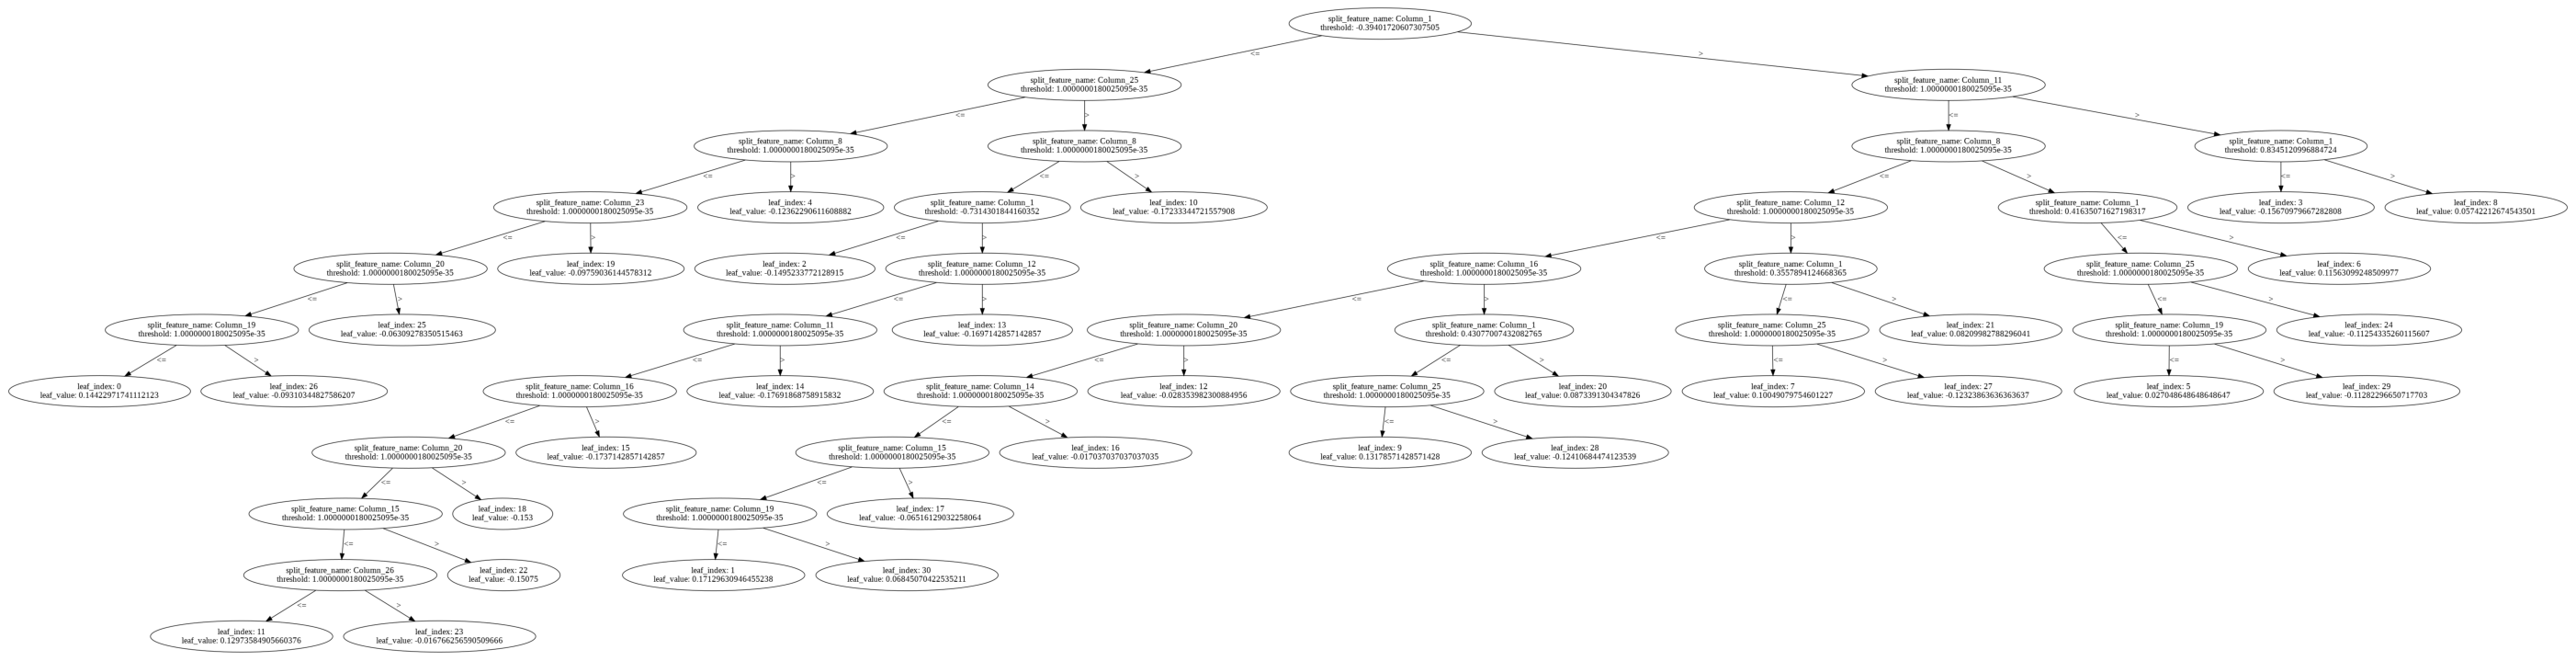

In [ ]:
#LGBM TREE 
import lightgbm
lightgbm.plot_tree(lgbm,figsize=(50,50))
plt.show()

In [ ]:
#Hyperparameter Tunning of LGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit


parameters=[{'learning_rate': [0.001, 0.05, 0.09, 0.1, 0.3, 0.5], 'max_depth': range(5, 25), 'n_estimators': range(30, 150, 10)}] 

lgbm_grid=RandomizedSearchCV(lgbm,parameters,cv=5,verbose=10)
lgbm_grid.fit(x_train_f,y_train_os)

y_pred_lgbm=lgbm_grid.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM_Hypertunning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.3, max_depth=9, n_estimators=100...........
[CV 1/5; 1/10] END learning_rate=0.3, max_depth=9, n_estimators=100;, score=0.753 total time=   2.1s
[CV 2/5; 1/10] START learning_rate=0.3, max_depth=9, n_estimators=100...........
[CV 2/5; 1/10] END learning_rate=0.3, max_depth=9, n_estimators=100;, score=0.953 total time=   2.0s
[CV 3/5; 1/10] START learning_rate=0.3, max_depth=9, n_estimators=100...........
[CV 3/5; 1/10] END learning_rate=0.3, max_depth=9, n_estimators=100;, score=0.952 total time=   2.3s
[CV 4/5; 1/10] START learning_rate=0.3, max_depth=9, n_estimators=100...........
[CV 4/5; 1/10] END learning_rate=0.3, max_depth=9, n_estimators=100;, score=0.952 total time=   1.3s
[CV 5/5; 1/10] START learning_rate=0.3, max_depth=9, n_estimators=100...........
[CV 5/5; 1/10] END learning_rate=0.3, max_depth=9, n_estimators=100;, score=0.952 total time=   1.4s
[CV 1/5; 2/10] START learning

array([[6676, 1217],
       [ 261,  788]])

In [ ]:
lgbm_grid.best_params_

{'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 100}

#<b>CatBoost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [ ]:
#loading libraries
from catboost import CatBoostClassifier
catb = CatBoostClassifier(learning_rate=0.1,max_depth=8,random_state=42)

catb.fit(x_train_f,y_train_os)
cv_score = cross_val_score(catb,x_train_f,y_train_os,cv=5)

y_pred_catb = catb.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_catb,'CatBoost')

Streaming output truncated to the last 5000 lines.
11:	learn: 0.2094939	total: 200ms	remaining: 16.4s
12:	learn: 0.2026840	total: 215ms	remaining: 16.3s
13:	learn: 0.1972723	total: 234ms	remaining: 16.5s
14:	learn: 0.1923531	total: 250ms	remaining: 16.4s
15:	learn: 0.1853771	total: 266ms	remaining: 16.4s
16:	learn: 0.1819156	total: 282ms	remaining: 16.3s
17:	learn: 0.1772835	total: 297ms	remaining: 16.2s
18:	learn: 0.1741838	total: 312ms	remaining: 16.1s
19:	learn: 0.1714718	total: 327ms	remaining: 16s
20:	learn: 0.1684247	total: 343ms	remaining: 16s
21:	learn: 0.1658771	total: 358ms	remaining: 15.9s
22:	learn: 0.1628012	total: 374ms	remaining: 15.9s
23:	learn: 0.1604524	total: 390ms	remaining: 15.9s
24:	learn: 0.1578529	total: 407ms	remaining: 15.9s
25:	learn: 0.1555944	total: 422ms	remaining: 15.8s
26:	learn: 0.1536601	total: 441ms	remaining: 15.9s
27:	learn: 0.1516987	total: 461ms	remaining: 16s
28:	learn: 0.1497033	total: 476ms	remaining: 15.9s
29:	learn: 0.1482525	total: 491ms	rem

array([[6805, 1088],
       [ 306,  743]])

#<b>ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# converting output variable into ANN output understandable format
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train_os = keras.utils.to_categorical(y_train_os, num_classes)

In [ ]:
#Initializine the ANN

ann = keras.models.Sequential()

ann.add(layers.Flatten())
#add input_Layer_and_1st_Hidden_Layer
ann.add(keras.layers.Dense(units = 128, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_second_hidden_layer
ann.add(keras.layers.Dense(units = 100, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_third_hidden_layer
ann.add(keras.layers.Dense(units = 75, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_fourth_hidden_layer
ann.add(keras.layers.Dense(units = 50 ,activation = 'relu'))

#add_Output_layer
ann.add(keras.layers.Dense(num_classes, activation="softmax"))                      
                           
#compiling the layers we defined earlier
ann.compile(optimizer ='adam' ,loss ='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#train_ANN

ann.fit(x_train,y_train, batch_size = 100, epochs = 50)

Epoch 1/50
358/358 [==============================] - 3s 6ms/step - loss: 0.2507 - accuracy: 0.8948
Epoch 2/50
358/358 [==============================] - 2s 6ms/step - loss: 0.2207 - accuracy: 0.9006
Epoch 3/50
358/358 [==============================] - 2s 6ms/step - loss: 0.2136 - accuracy: 0.9026
Epoch 4/50
358/358 [==============================] - 2s 5ms/step - loss: 0.2103 - accuracy: 0.9039
Epoch 5/50
358/358 [==============================] - 1s 3ms/step - loss: 0.2086 - accuracy: 0.9049
Epoch 6/50
358/358 [==============================] - 1s 3ms/step - loss: 0.2057 - accuracy: 0.9062
Epoch 7/50
358/358 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.9057
Epoch 8/50
358/358 [==============================] - 1s 3ms/step - loss: 0.2032 - accuracy: 0.9082
Epoch 9/50
358/358 [==============================] - 1s 3ms/step - loss: 0.2019 - accuracy: 0.9077
Epoch 10/50
358/358 [==============================] - 1s 3ms/step - loss: 0.1996 - accuracy: 0.9083

In [ ]:
y_pred_tuned_ann=ann.predict(x_test)
y_pred_tuned_ann1=np.where(y_pred_tuned_ann>0.5,1,0)
print_metrics((y_test[:,1]),(y_pred_tuned_ann1[:,1]),'tuned_xg_test')

tuned_xg_test Test accuracy Score 0.9021471706553343
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      7893
         1.0       0.60      0.52      0.55      1049

    accuracy                           0.90      8942
   macro avg       0.77      0.74      0.75      8942
weighted avg       0.90      0.90      0.90      8942



array([[7524,  369],
       [ 506,  543]])

#Feature Importance

<BarContainer object of 35 artists>

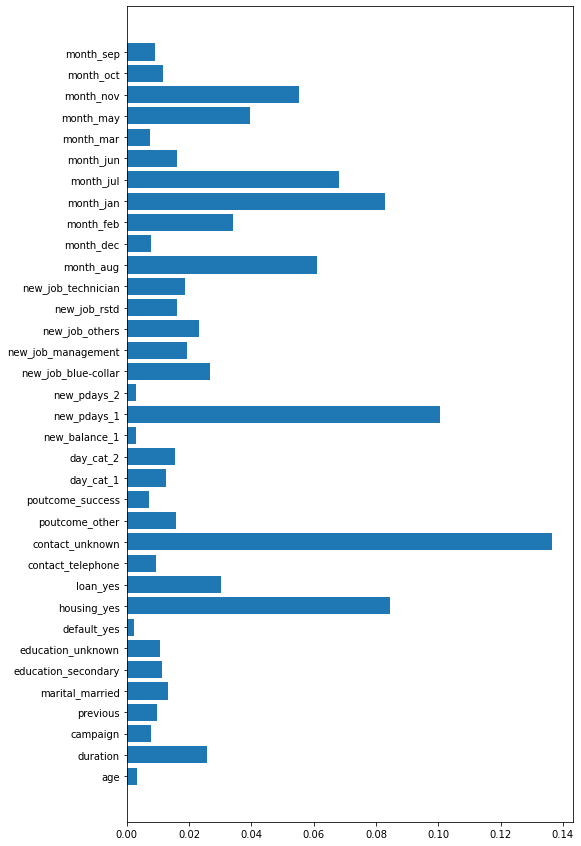

In [ ]:
plt.figure(figsize=(8,15))
plt.barh(X.columns, xg_reg.feature_importances_)

<BarContainer object of 22 artists>

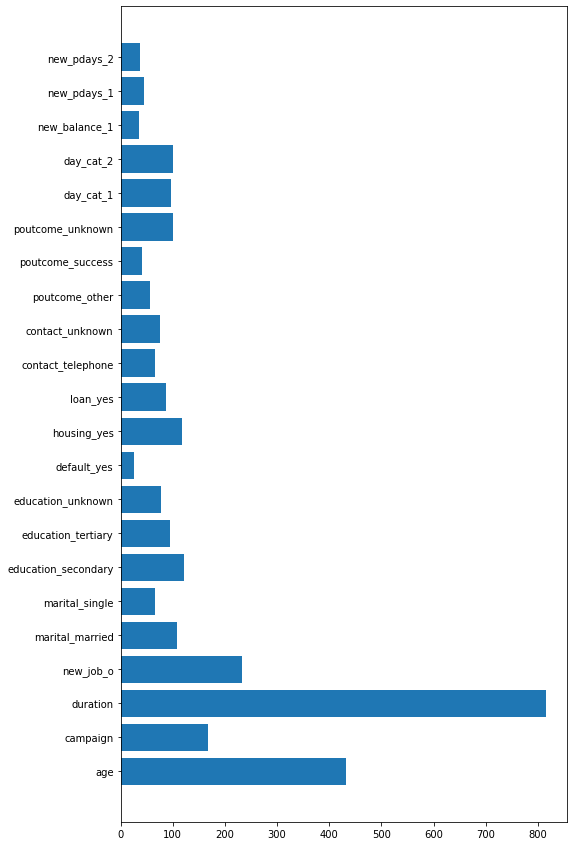

In [ ]:
plt.figure(figsize=(8,15))
plt.barh(X.columns, lgbm.feature_importances_)

#<b>Model Comparision

In [ ]:
model = ['Logistic, KNN, Random Forest, XGBoost,LGBM, CatBoost, ANN']